In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import requests
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
start_date = '2000-12-01'
end_date = datetime.today().strftime('%Y-%m-%d')

api_key = "8e877013bcb3862ac90cd864024bdb75"

def download_fred_data(series_id, start_date, end_date):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&observation_start={start_date}&observation_end={end_date}&file_type=json"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.rename(columns={'value': series_id}, inplace=True)
    return df

def process_yield_data(data, column):
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data.index = pd.to_datetime(data.index)
    data.reset_index(inplace=True)
    data['Date'] = pd.to_datetime(data['date'])
    data.drop(columns=['date'], inplace=True)
    data.dropna(inplace=True)
    return data[['Date', column]]

two_year_yield_curve_data = process_yield_data(download_fred_data("DGS2", "1900-01-01", "2025-12-31"), 'DGS2')
time.sleep(2)
ten_year_yield_curve_data = process_yield_data(download_fred_data("DGS10", "1900-01-01", "2025-12-31"), 'DGS10')
time.sleep(2)
five_year_yield_curve_data = process_yield_data(download_fred_data("DGS5", "1900-01-01", "2025-12-31"), 'DGS5')
time.sleep(2)
DCOILWTICO_data = process_yield_data(download_fred_data("DCOILWTICO", "1900-01-01", "2025-12-31"), 'DCOILWTICO')
time.sleep(2)
Volatility_Index = process_yield_data(download_fred_data("VIXCLS", "1900-01-01", "2025-12-31"), 'VIXCLS')

def process_data(data, column):
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data.reset_index(inplace=True)
    data['Date'] = pd.to_datetime(data['date'])
    daily_data = []
    for index, row in data.iterrows():
        month_days = pd.date_range(start=row['Date'], end=row['Date'].replace(day=1) + pd.offsets.MonthEnd(0), freq='D')
        daily_values = [row[column]] * len(month_days)
        daily_data.append(pd.DataFrame({column: daily_values, 'Date': month_days}))
    daily_data_df = pd.concat(daily_data, ignore_index=True)
    daily_data_df.dropna(inplace=True)
    return daily_data_df[[column, 'Date']]

interest_rate_data = process_data(download_fred_data("FEDFUNDS", "1900-01-01", "2025-12-31"), 'FEDFUNDS')
time.sleep(2)
inflation_data = process_data(download_fred_data("CPIAUCNS", "1900-01-01", "2025-12-31"), 'CPIAUCNS')
time.sleep(2)
industrial_orders_data = process_data(download_fred_data("AMTMNO", "1900-01-01", "2025-12-31"), 'AMTMNO')
time.sleep(2)
consumer_sentiment_data = process_data(download_fred_data("UMCSENT", "1900-01-01", "2025-12-31"), 'UMCSENT')
time.sleep(2)
retail_sales_data = process_data(download_fred_data("RSXFS", "1900-01-01", "2025-12-31"), 'RSXFS')
time.sleep(2)
unemployment_rate_data = process_data(download_fred_data("UNRATE", "1900-01-01", "2025-12-31"), 'UNRATE')
time.sleep(2)
M2_Money_Stock_data = process_data(download_fred_data("M2SL", "1900-01-01", "2025-12-31"), 'M2SL')
time.sleep(2)
Producer_Price_Index = process_data(download_fred_data("PPIACO", "1900-01-01", "2025-12-31"), 'PPIACO')
time.sleep(2)
Total_Nonfarm_Payroll = process_data(download_fred_data("PAYEMS", "1900-01-01", "2025-12-31"), 'PAYEMS')
time.sleep(2)
Industrial_Production_Index = process_data(download_fred_data("INDPRO", "1900-01-01", "2025-12-31"), 'INDPRO')
time.sleep(2)
Crude_Petroleum = process_data(download_fred_data("WPU0561", "1900-01-01", "2025-12-31"), 'WPU0561')
time.sleep(2)
pce_data = process_data(download_fred_data("PCE", "1900-01-01", "2025-12-31"), 'PCE')
time.sleep(2)
Manufacturing_Production_data = process_data(download_fred_data("IPMAN", "1900-01-01", "2025-12-31"), 'IPMAN')
time.sleep(2)
House_Price_Index_data = process_data(download_fred_data("CSUSHPISA", "1900-01-01", "2025-12-31"), 'CSUSHPISA')
time.sleep(2)
Commodity_Price_Index_data = process_data(download_fred_data("PALLFNFINDEXM", "1900-01-01", "2025-12-31"), 'PALLFNFINDEXM')
time.sleep(2)
Chicago_Fed_National_Activity_Index_data = process_data(download_fred_data("CFNAI", "1900-01-01", "2025-12-31"), 'CFNAI')
time.sleep(2)
Personal_Income_data = process_data(download_fred_data("PI", "1900-01-01", "2025-12-31"), 'PI')
time.sleep(2)
labor_force_participation_rate_data = process_data(download_fred_data("CIVPART", "1948-01-01", "2025-12-31"), 'CIVPART')
time.sleep(2)
trade_balance_data = process_data(download_fred_data("BOPGSTB", "1960-01-01", "2025-12-31"), 'BOPGSTB')
time.sleep(2)
M1_Money_Stock_data = process_data(download_fred_data("M1SL", "1959-01-01", "2025-12-31"), 'M1SL')
time.sleep(2)
Copper_Price_data = process_data(download_fred_data("PCOPPUSDM", "1983-01-01", "2025-12-31"), 'PCOPPUSDM')
time.sleep(2)
Durable_Goods_Production_Index_data = process_data(download_fred_data("IPDMAN", "1972-01-01", "2025-12-31"), 'IPDMAN')
time.sleep(2)
PCE_Services_data = process_data(download_fred_data("PCES", "1959-01-01", "2025-12-31"), 'PCES')
time.sleep(2)
Consumer_Goods_Production_Index_data = process_data(download_fred_data("IPCONGD", "1972-01-01", "2025-12-31"), 'IPCONGD')
time.sleep(2)
Construction_Materials_Production_Index_data = process_data(download_fred_data("IPB51220N", "1972-01-01", "2025-12-31"), 'IPB51220N')
time.sleep(2)
CPIAUCSL_data = process_data(download_fred_data("CPIAUCSL", "1900-01-01", "2025-12-31"), 'CPIAUCSL')
time.sleep(2)
CPILFESL_data = process_data(download_fred_data("CPILFESL", "1900-01-01", "2025-12-31"), 'CPILFESL')

def process_quarterly_data(data, column):
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data.reset_index(inplace=True)
    data['Date'] = pd.to_datetime(data['date'])
    daily_data = []
    for index, row in data.iterrows():
        quarter_end = row['Date'] + pd.offsets.QuarterEnd(0)
        quarter_days = pd.date_range(start=row['Date'], end=quarter_end, freq='D')
        daily_values = [row[column]] * len(quarter_days)
        daily_data.append(pd.DataFrame({column: daily_values, 'Date': quarter_days}))
    daily_data_df = pd.concat(daily_data, ignore_index=True)
    daily_data_df.dropna(inplace=True)
    return daily_data_df[[column, 'Date']]

investment_data = process_quarterly_data(download_fred_data("GPDIC1", "1900-01-01", "2024-12-31"), 'GPDIC1')
time.sleep(2)
gdp_data = process_quarterly_data(download_fred_data("GDP", "1900-01-01", "2024-12-31"), 'GDP')
time.sleep(2)
balance_commerciale = process_quarterly_data(download_fred_data("NETEXP", "1900-01-01", "2024-12-31"), 'NETEXP')
time.sleep(2)
déficit_budgétaire = process_quarterly_data(download_fred_data("GFDEBTN", "1900-01-01", "2024-12-31"), 'GFDEBTN')

currency_pairs = ['GBPUSD=X','EURUSD=X', 'EURGBP=X', 'EURJPY=X', 'EURCAD=X', 'GBPNZD=X', 'CNYUSD=X', 'CNYEUR=X', 'GBPCNY=X', 'EURCHF=X', 'CHFUSD=X', 'GC=F','DX-Y.NYB','^IRX','^TNX','USDJPY=X','EEM','TLT','^GSPC','GC=F','USDCHF=X','^DJI','EURNOK=X','CL=F']

currency_data_list = []

for currency_pair in currency_pairs:
    currency_data = yf.download(currency_pair, start=start_date)
    currency_data = currency_data[['Close']].reset_index()
    currency_name = currency_pair.split('=')[0]
    formatted_currency_name = currency_name[:3] + '/' + currency_name[3:]
    currency_data.columns = ['Date', formatted_currency_name]
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data_list.append(currency_data)

final_currency_data = currency_data_list[0]

for data in currency_data_list[1:]:
    final_currency_data = pd.merge(final_currency_data, data, on='Date', how='outer')

final_currency_data.dropna(inplace=True)

final_currency_data = final_currency_data.reset_index(drop=True)

final_currency_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Date   GBP/USD   EUR/USD  EUR/GBP     EUR/JPY  EUR/CAD  GBP/NZD  \
0    2003-12-01  1.718597  1.196501  0.69570  130.580002  1.55960  2.67300   
1    2003-12-02  1.730313  1.208897  0.69800  131.440002  1.56700  2.67540   
2    2003-12-03  1.728101  1.212298  0.70070  131.259995  1.57590  2.67340   
3    2003-12-04  1.720697  1.208094  0.70180  130.759995  1.58290  2.66510   
4    2003-12-05  1.733102  1.218695  0.70300  130.729996  1.58760  2.68170   
...         ...       ...       ...      ...         ...      ...      ...   
5426 2025-09-23  1.351497  1.180108  0.87310  174.328995  1.63138  2.30251   
5427 2025-09-24  1.352448  1.181447  0.87359  174.382004  1.63479  2.30887   
5428 2025-09-25  1.345240  1.174467  0.87300  174.695999  1.63191  2.31248   
5429 2025-09-26  1.333653  1.166276  0.87445  174.772995  1.62583  2.31390   
5430 2025-09-29  1.343238  1.172883  0.87293  174.317001  1.63186  2.32431   

       CNY/USD   CNY/EUR    GBP/CNY  ...  ^TN/X     USD/JPY       EEM/  \
0     0.120960  0.100850  14.185000  ...  4.392  109.169998  11.303281   
1     0.120960  0.099770  14.283000  ...  4.380  108.730003  11.253135   
2     0.120961  0.099700  14.257000  ...  4.410  108.300003  11.213888   
3     0.120963  0.099870  14.205000  ...  4.369  108.269997  11.136852   
4     0.120964  0.099180  14.279000  ...  4.215  107.620003  11.115778   
...        ...       ...        ...  ...    ...         ...        ...   
5426  0.140568  0.119101   9.614033  ...  4.120  147.725006  53.299999   
5427  0.140615  0.119008   9.616508  ...  4.147  147.613007  53.119999   
5428  0.140223  0.119364   9.593829  ...  4.172  148.751007  52.810001   
5429  0.140178  0.120159   9.513636  ...  4.187  149.860992  52.709999   
5430  0.140471  0.119690   9.564900  ...  4.141  148.660995  53.189999   

           TLT/       ^GS/PC        GC/_y  USD/CHF         ^DJ/I   EUR/NOK  \
0     41.180088  1070.119995   402.700012  1.29810   9899.049805   8.16400   
1     41.356117  1066.619995   403.700012  1.28720   9853.639648   8.16350   
2     41.189877  1064.729980   403.899994  1.28520   9873.419922   8.11800   
3     41.282776  1069.719971   403.299988  1.28850   9930.820312   8.08380   
4     41.942703  1061.500000   406.399994  1.27240   9862.679688   8.08250   
...         ...          ...          ...      ...           ...       ...   
5426  89.320000  6656.919922  3780.600098  0.79239  46292.781250  11.69616   
5427  88.980003  6637.970215  3732.100098  0.79143  46121.281250  11.67357   
5428  88.980003  6604.720215  3736.899902  0.79466  45947.320312  11.66958   
5429  88.900002  6643.700195  3775.300049  0.80004  46247.289062  11.70150   
5430  89.629997  6661.209961  3856.800049  0.79770  46316.070312  11.70143   

            CL/  
0     29.950001  
1     30.780001  
2     31.100000  
3     31.260000  
4     30.730000  
...         ...  
5426  63.410000  
5427  64.989998  
5428  64.980003  
5429  65.720001  
5430  63.230000  

[5431 rows x 25 columns]

In [5]:
chosen_currency = input("Veuillez entrer la paire de devises (par exemple, EUR/USD) : ")

base, quote = chosen_currency.split("/")
currency_pair = f"{base}{quote}=X"

data = yf.download(currency_pair, start=start_date, end=end_date)

currency_data = data[['Close']].reset_index()
currency_data.columns = ['Date', chosen_currency]

currency_data = currency_data.dropna().reset_index(drop=True)
currency_data

[*********************100%***********************]  1 of 1 completed


Date   EUR/USD
0    2003-12-01  1.196501
1    2003-12-02  1.208897
2    2003-12-03  1.212298
3    2003-12-04  1.208094
4    2003-12-05  1.218695
...         ...       ...
5658 2025-09-22  1.173695
5659 2025-09-23  1.180108
5660 2025-09-24  1.181447
5661 2025-09-25  1.174467
5662 2025-09-26  1.166276

[5663 rows x 2 columns]

In [6]:

datasets = [
    "two_year_yield_curve_data",
    "ten_year_yield_curve_data",
    "inflation_data",
    "DCOILWTICO_data",
    "investment_data",
    "gdp_data",
    "consumer_sentiment_data",
    "retail_sales_data",
    "interest_rate_data",
    "five_year_yield_curve_data",
    "unemployment_rate_data",
    "M2_Money_Stock_data",
    "Producer_Price_Index",
    "Total_Nonfarm_Payroll",
    "Volatility_Index",
    "Industrial_Production_Index",
    "Crude_Petroleum",
    "pce_data",
    "Personal_Income_data",
    "Chicago_Fed_National_Activity_Index_data",
    "Commodity_Price_Index_data",
    "House_Price_Index_data",
    "Manufacturing_Production_data",
    "labor_force_participation_rate_data",
    "trade_balance_data",
    "M1_Money_Stock_data",
    "Durable_Goods_Production_Index_data",
    "Copper_Price_data",
    "PCE_Services_data",
    "Consumer_Goods_Production_Index_data",
    "Construction_Materials_Production_Index_data",
    "balance_commerciale",
    "déficit_budgétaire",
    "CPIAUCSL_data",
    "CPILFESL_data",
    "final_currency_data",
    "currency_data"
]

pmi_data = globals()[datasets[0]]

for data_name in datasets[1:]:
    data = globals()[data_name]
    pmi_data = pd.merge(pmi_data, data, on='Date', how='outer', suffixes=('', '_dup'))

    columns_to_drop = [col for col in pmi_data.columns if col.endswith('_dup')]
    pmi_data.drop(columns=columns_to_drop, inplace=True)

pmi_data.dropna(inplace=True)
pmi_data.reset_index(drop=True, inplace=True)
pmi_data


Date  DGS2  DGS10  CPIAUCNS  DCOILWTICO    GPDIC1        GDP  \
0    2003-12-01  2.12   4.40   184.300       29.89  2493.928  11772.234   
1    2003-12-02  2.07   4.38   184.300       30.74  2493.928  11772.234   
2    2003-12-03  2.09   4.41   184.300       30.61  2493.928  11772.234   
3    2003-12-04  2.06   4.38   184.300       31.24  2493.928  11772.234   
4    2003-12-05  1.88   4.23   184.300       30.68  2493.928  11772.234   
...         ...   ...    ...       ...         ...       ...        ...   
5201 2024-12-24  4.29   4.59   315.605       70.87  4315.564  29825.182   
5202 2024-12-26  4.30   4.58   315.605       70.38  4315.564  29825.182   
5203 2024-12-27  4.31   4.62   315.605       71.28  4315.564  29825.182   
5204 2024-12-30  4.24   4.55   315.605       71.73  4315.564  29825.182   
5205 2024-12-31  4.25   4.58   315.605       72.44  4315.564  29825.182   

      UMCSENT     RSXFS  FEDFUNDS  ...  ^TN/X     USD/JPY       EEM/  \
0        92.6  271550.0      0.98  ...  4.392  109.169998  11.303281   
1        92.6  271550.0      0.98  ...  4.380  108.730003  11.253135   
2        92.6  271550.0      0.98  ...  4.410  108.300003  11.213888   
3        92.6  271550.0      0.98  ...  4.369  108.269997  11.136852   
4        92.6  271550.0      0.98  ...  4.215  107.620003  11.115778   
...       ...       ...       ...  ...    ...         ...        ...   
5201     74.0  622396.0      4.48  ...  4.591  157.164993  42.230888   
5202     74.0  622396.0      4.48  ...  4.579  157.132996  42.082329   
5203     74.0  622396.0      4.48  ...  4.619  157.748001  41.894150   
5204     74.0  622396.0      4.48  ...  4.545  157.873001  41.557411   
5205     74.0  622396.0      4.48  ...  4.573  156.994995  41.418755   

           TLT/       ^GS/PC        GC/_y  USD/CHF         ^DJ/I   EUR/NOK  \
0     41.180088  1070.119995   402.700012  1.29810   9899.049805   8.16400   
1     41.356117  1066.619995   403.700012  1.28720   9853.639648   8.16350   
2     41.189877  1064.729980   403.899994  1.28520   9873.419922   8.11800   
3     41.282776  1069.719971   403.299988  1.28850   9930.820312   8.08380   
4     41.942703  1061.500000   406.399994  1.27240   9862.679688   8.08250   
...         ...          ...          ...      ...           ...       ...   
5201  85.357185  6040.040039  2620.000000  0.89847  43297.031250  11.81031   
5202  85.308617  6037.589844  2638.800049  0.89942  43325.800781  11.77991   
5203  84.609200  5970.839844  2617.199951  0.89890  42992.210938  11.87089   
5204  85.289185  5906.939941  2606.100098  0.90184  42573.730469  11.83283   
5205  84.832626  5881.629883  2629.199951  0.90324  42544.218750  11.78811   

            CL/  
0     29.950001  
1     30.780001  
2     31.100000  
3     31.260000  
4     30.730000  
...         ...  
5201  70.099998  
5202  69.620003  
5203  70.599998  
5204  70.989998  
5205  71.720001  

[5206 rows x 60 columns]

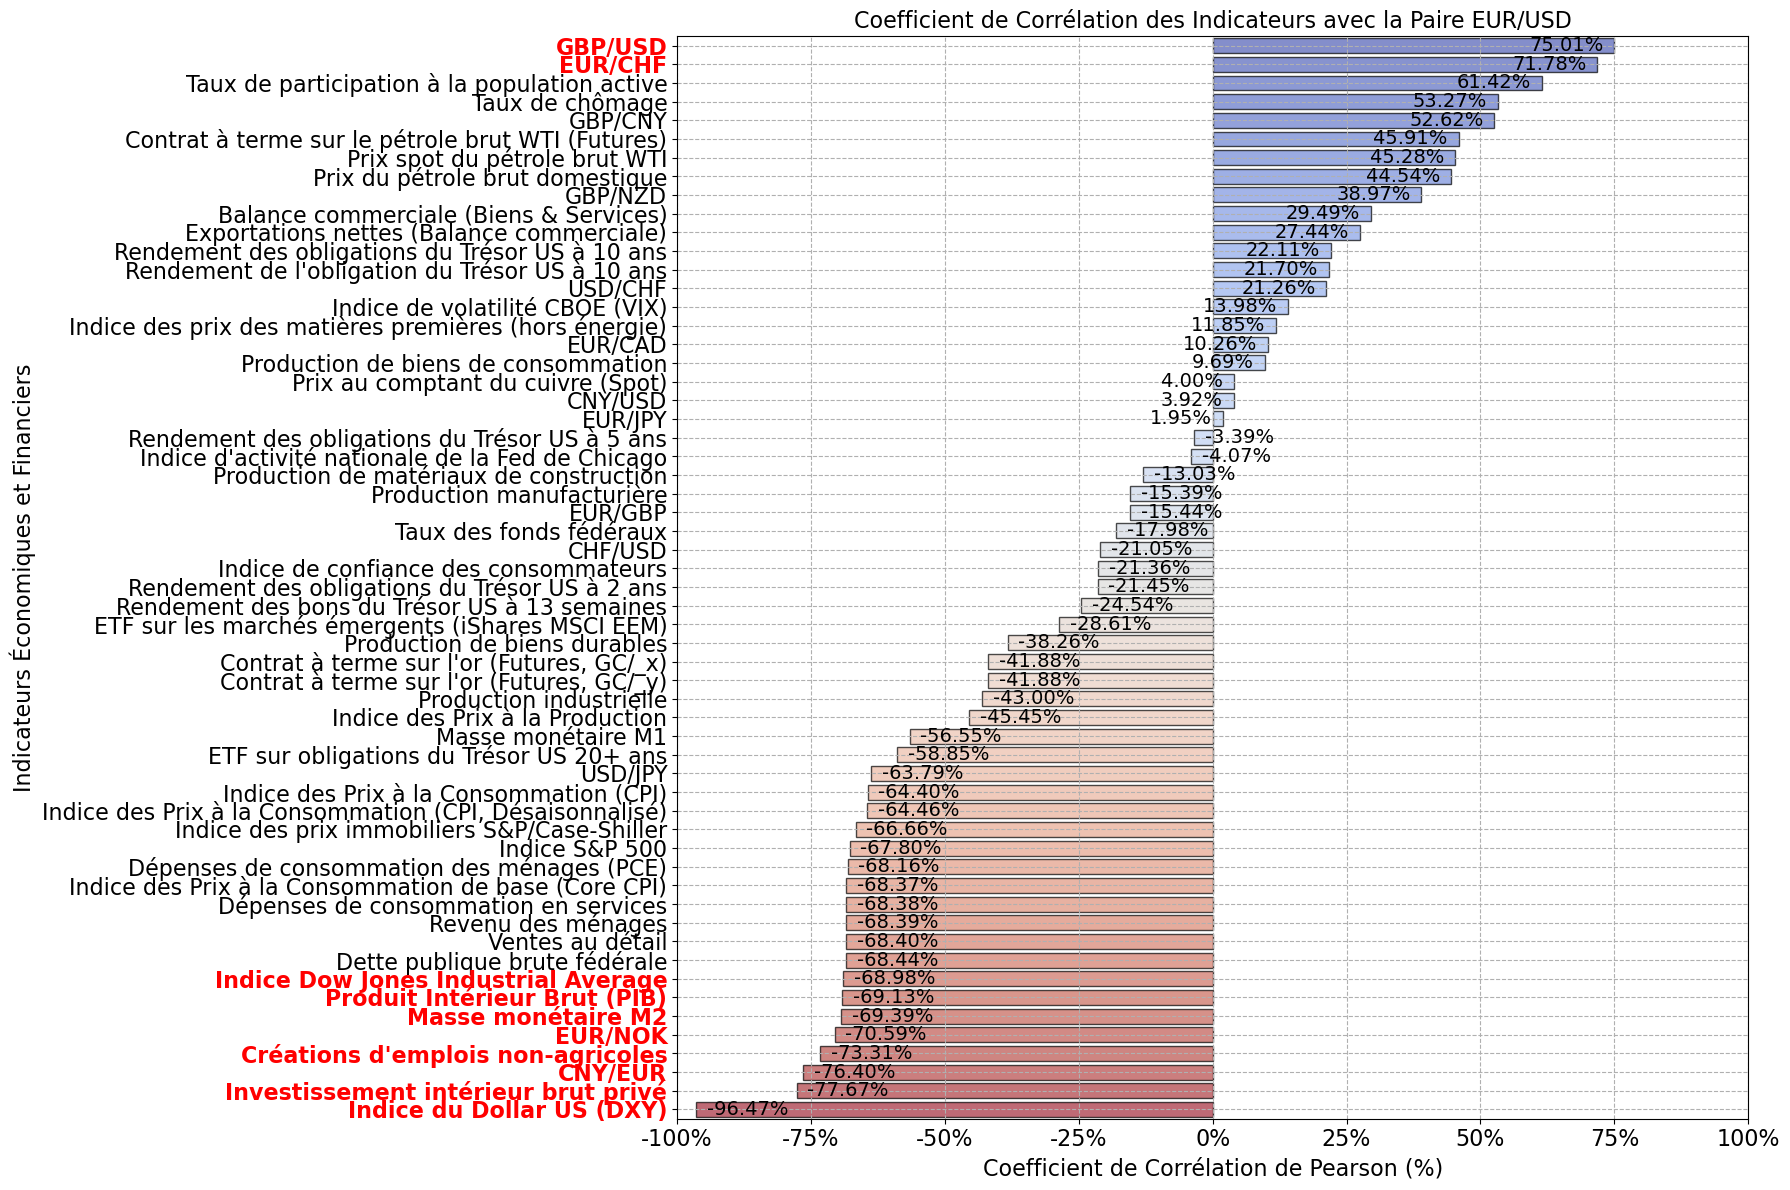

In [7]:
ticker_to_name_map = {
    'DGS2': "Rendement des obligations du Trésor US à 2 ans",
    'DGS5': "Rendement des obligations du Trésor US à 5 ans",
    'DGS10': "Rendement des obligations du Trésor US à 10 ans",
    'FEDFUNDS': "Taux des fonds fédéraux",
    '^IR/X': "Rendement des bons du Trésor US à 13 semaines",
    '^TN/X': "Rendement de l'obligation du Trésor US à 10 ans",
    'TLT/': "ETF sur obligations du Trésor US 20+ ans",
    'CPIAUCNS': "Indice des Prix à la Consommation (CPI)",
    'CPIAUCSL': "Indice des Prix à la Consommation (CPI, Désaisonnalisé)",
    'CPILFESL': "Indice des Prix à la Consommation de base (Core CPI)",
    'PCE': "Dépenses de consommation des ménages (PCE)",
    'PPIACO': "Indice des Prix à la Production",
    'CSUSHPISA': "Indice des prix immobiliers S&P/Case-Shiller",
    'PALLFNFINDEXM': "Indice des prix des matières premières (hors énergie)",
    'PCOPPUSDM': "Prix au comptant du cuivre (Spot)",
    'GDP': "Produit Intérieur Brut (PIB)",
    'UNRATE': "Taux de chômage",
    'PAYEMS': "Créations d'emplois non-agricoles",
    'INDPRO': "Production industrielle",
    'IPMAN': "Production manufacturière",
    'CFNAI': "Indice d'activité nationale de la Fed de Chicago",
    'GPDIC1': "Investissement intérieur brut privé",
    'CIVPART': "Taux de participation à la population active",
    'IPDMAN': "Production de biens durables",
    'IPCONGD': "Production de biens de consommation",
    'IPB51220N': "Production de matériaux de construction",
    'BOPGSTB': "Balance commerciale (Biens & Services)",
    'NETEXP': "Exportations nettes (Balance commerciale)",
    'GFDEBTN': "Dette publique brute fédérale",
    'UMCSENT': "Indice de confiance des consommateurs",
    'RSXFS': "Ventes au détail",
    'PI': "Revenu des ménages",
    'PCES': "Dépenses de consommation en services",
    'M1SL': "Masse monétaire M1",
    'M2SL': "Masse monétaire M2",
    'DCOILWTICO': "Prix spot du pétrole brut WTI",
    'WPU0561': "Prix du pétrole brut domestique",
    'VIXCLS': "Indice de volatilité CBOE (VIX)",
    'CL/': "Contrat à terme sur le pétrole brut WTI (Futures)",
    'GC/_x': "Contrat à terme sur l'or (Futures, GC/_x)",
    'GC/_y': "Contrat à terme sur l'or (Futures, GC/_y)",
    '^GS/PC': "Indice S&P 500",
    '^DJ/I': "Indice Dow Jones Industrial Average",
    'EUR/USD': 'EUR/USD', 'GBP/USD': 'GBP/USD', 'USD/JPY': "USD/JPY", 'EUR/GBP': "EUR/GBP",
    'EUR/JPY': "EUR/JPY", 'EUR/CAD': "EUR/CAD", 'GBP/NZD': "GBP/NZD", 'CNY/USD': "CNY/USD",
    'CNY/EUR': "CNY/EUR", 'EUR/CHF': 'EUR/CHF', 'CHF/USD': "CHF/USD", 'EUR/NOK': "EUR/NOK",
    'GBP/CNY': "GBP/CNY", 'USD/CHF': "USD/CHF",
    'DX-/Y.NYB': "Indice du Dollar US (DXY)",
    'EEM/': "ETF sur les marchés émergents (iShares MSCI EEM)",
}

if chosen_currency in pmi_data.columns:
    numeric_columns = pmi_data.select_dtypes(include='number')
    correlation_matrix = numeric_columns.corrwith(pmi_data[chosen_currency])
    correlation_matrix.drop(chosen_currency, inplace=True, errors='ignore')

    top_10_correlations = correlation_matrix.abs().nlargest(10)
    top_3_indices = top_10_correlations.index

    correlation_matrix.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(18, 12))

    ax = sns.barplot(y=correlation_matrix.index, x=correlation_matrix.values, palette='coolwarm', edgecolor='black', alpha=0.7, orient='h')

    plt.title(f'Coefficient de Corrélation des Indicateurs avec la Paire {chosen_currency}', fontsize=16)
    plt.xlabel('Coefficient de Corrélation de Pearson (%)', fontsize=16)
    plt.ylabel('Indicateurs Économiques et Financiers', fontsize=16)
    plt.xticks(rotation=0, ha='center', fontsize=16)
    plt.yticks(rotation=0, fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=1)
    plt.grid(axis='y', linestyle='--', alpha=1)
    plt.xlim(-1, 1)

    for label in ax.get_yticklabels():
        if label.get_text() in top_3_indices:
            label.set_color('red')
            label.set_weight('bold')

    new_labels = [ticker_to_name_map.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()]
    ax.set_yticklabels(new_labels)

    xlabels = [f'{x*100:.0f}%' for x in ax.get_xticks()]
    ax.set_xticklabels(xlabels)

    for i, (ticker, value) in enumerate(correlation_matrix.items()):
        if value >= 0:
            plt.text(value - 0.02, i, f'{value*100:.2f}%', ha='right', va='center', fontsize=14, color='black')
        else:
            plt.text(value + 0.02, i, f'{value*100:.2f}%', ha='left', va='center', fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

else:
    print(f"La colonne '{chosen_currency}' n'existe pas dans les données.")

In [8]:
first_indicator = top_3_indices[0]
second_indicator = top_3_indices[1]
third_indicator = top_3_indices[2]
fourth_indicator = top_3_indices[3]
fifth_indicator = top_3_indices[4]
sixth_indicator = top_3_indices[5]
seventh_indicator = top_3_indices[6]
eighth_indicator = top_3_indices[7]
ninth_indicator = top_3_indices[8]
tenth_indicator = top_3_indices[9]

colonnes_a_garder = [chosen_currency, first_indicator, second_indicator, third_indicator,
                    fourth_indicator, fifth_indicator, sixth_indicator, seventh_indicator,
                    eighth_indicator, ninth_indicator, tenth_indicator, 'Date']

pmi_data = pmi_data[colonnes_a_garder]

pmi_data.interpolate(method='linear', inplace=True)

columns_to_normalize = [chosen_currency, first_indicator, second_indicator, third_indicator,
                    fourth_indicator, fifth_indicator, sixth_indicator, seventh_indicator,
                    eighth_indicator, ninth_indicator, tenth_indicator]

scaler = StandardScaler()

pmi_data[columns_to_normalize] = scaler.fit_transform(pmi_data[columns_to_normalize])
pmi_data

EUR/USD  DX-/Y.NYB    GPDIC1   CNY/EUR   GBP/USD    PAYEMS   EUR/CHF  \
0    -0.255382   0.069667 -1.063309 -1.206983  0.806060 -1.275504  1.358445   
1    -0.158678  -0.006614 -1.063309 -1.276663  0.855044 -1.275504  1.375093   
2    -0.132154  -0.021655 -1.063309 -1.281179  0.845792 -1.275504  1.382742   
3    -0.164944  -0.010912 -1.063309 -1.270211  0.814838 -1.275504  1.374193   
4    -0.082249  -0.060333 -1.063309 -1.314728  0.866703 -1.275504  1.348997   
...        ...        ...       ...       ...       ...       ...       ...   
5201 -1.471720   1.993884  1.698008  0.781718 -1.138623  2.098222 -1.420548   
5202 -1.476616   1.979917  1.698008  0.786428 -1.134745  2.098222 -1.418793   
5203 -1.458182   1.965950  1.698008  0.767524 -1.140593  2.098222 -1.411684   
5204 -1.453348   1.979917  1.698008  0.761394 -1.120087  2.098222 -1.395081   
5205 -1.471466   2.018594  1.698008  0.779717 -1.132507  2.098222 -1.397871   

       EUR/NOK      M2SL       GDP     ^DJ/I       Date  
0    -0.719419 -1.272944 -1.432738 -1.020800 2003-12-01  
1    -0.719827 -1.272944 -1.432738 -1.025611 2003-12-02  
2    -0.756963 -1.272944 -1.432738 -1.023515 2003-12-03  
3    -0.784877 -1.272944 -1.432738 -1.017434 2003-12-04  
4    -0.785938 -1.272944 -1.432738 -1.024653 2003-12-05  
...        ...       ...       ...       ...        ...  
5201  2.256630  1.764934  2.333490  2.517862 2024-12-24  
5202  2.231818  1.764934  2.333490  2.520910 2024-12-26  
5203  2.306074  1.764934  2.333490  2.485565 2024-12-27  
5204  2.275011  1.764934  2.333490  2.441225 2024-12-30  
5205  2.238511  1.764934  2.333490  2.438098 2024-12-31  

[5206 rows x 12 columns]

--- Test pour un split de 40% / 60% ---
  -> Résultat : MSE pour 40% d'entraînement = 0.0290
--- Test pour un split de 50% / 50% ---
  -> Résultat : MSE pour 50% d'entraînement = 0.0359
--- Test pour un split de 60% / 40% ---
  -> Résultat : MSE pour 60% d'entraînement = 0.0258
--- Test pour un split de 70% / 30% ---
  -> Résultat : MSE pour 70% d'entraînement = 0.0313
--- Test pour un split de 80% / 20% ---
  -> Résultat : MSE pour 80% d'entraînement = 0.0010
--- Test pour un split de 90% / 10% ---
  -> Résultat : MSE pour 90% d'entraînement = 0.0005

Meilleur split trouvé : 90% d'entraînement avec un MSE de 0.0005


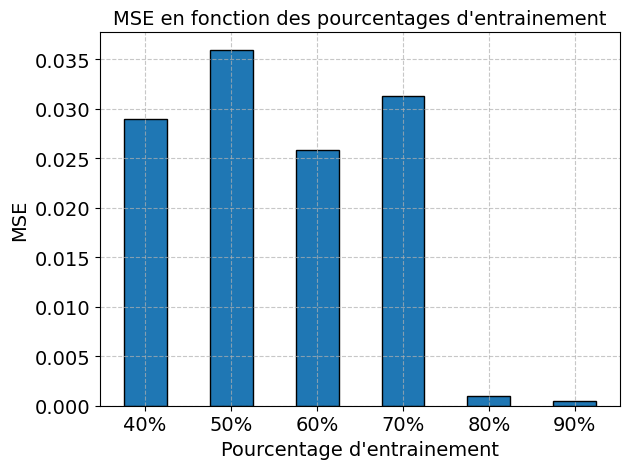

In [9]:

def prepare_data(data, look_back=6):
    X_retail_sales = []
    X_Inflation = []
    X_GDP = []
    X_GPDIC1 = []
    X_indicator4 = []
    X_indicator5 = []
    X_indicator6 = []
    X_indicator7 = []
    X_indicator8 = []
    X_indicator9 = []
    X_indicator10 = []

    y_retail_sales = []
    y_Inflation = []
    y_GDP = []
    y_GPDIC1 = []
    y_indicator4 = []
    y_indicator5 = []
    y_indicator6 = []
    y_indicator7 = []
    y_indicator8 = []
    y_indicator9 = []
    y_indicator10 = []

    for i in range(len(data) - look_back):
        X_row_retail_sales = []
        X_row_Inflation = []
        X_row_GDP = []
        X_row_GPDIC1 = []
        X_row_indicator4 = []
        X_row_indicator5 = []
        X_row_indicator6 = []
        X_row_indicator7 = []
        X_row_indicator8 = []
        X_row_indicator9 = []
        X_row_indicator10 = []

        for column in [chosen_currency, first_indicator, second_indicator, third_indicator,
                      fourth_indicator, fifth_indicator, sixth_indicator, seventh_indicator,
                      eighth_indicator, ninth_indicator, tenth_indicator]:
            if column == chosen_currency:
                X_row_retail_sales.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == first_indicator:
                X_row_Inflation.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == second_indicator:
                X_row_GDP.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == third_indicator:
                X_row_GPDIC1.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == fourth_indicator:
                X_row_indicator4.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == fifth_indicator:
                X_row_indicator5.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == sixth_indicator:
                X_row_indicator6.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == seventh_indicator:
                X_row_indicator7.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == eighth_indicator:
                X_row_indicator8.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == ninth_indicator:
                X_row_indicator9.extend(data[column].iloc[i:i+look_back].values.flatten())
            elif column == tenth_indicator:
                X_row_indicator10.extend(data[column].iloc[i:i+look_back].values.flatten())

        X_retail_sales.append(X_row_retail_sales)
        X_Inflation.append(X_row_Inflation)
        X_GDP.append(X_row_GDP)
        X_GPDIC1.append(X_row_GPDIC1)
        X_indicator4.append(X_row_indicator4)
        X_indicator5.append(X_row_indicator5)
        X_indicator6.append(X_row_indicator6)
        X_indicator7.append(X_row_indicator7)
        X_indicator8.append(X_row_indicator8)
        X_indicator9.append(X_row_indicator9)
        X_indicator10.append(X_row_indicator10)

        y_retail_sales.append(data[chosen_currency].iloc[i+look_back])
        y_Inflation.append(data[first_indicator].iloc[i+look_back])
        y_GDP.append(data[second_indicator].iloc[i+look_back])
        y_GPDIC1.append(data[third_indicator].iloc[i+look_back])
        y_indicator4.append(data[fourth_indicator].iloc[i+look_back])
        y_indicator5.append(data[fifth_indicator].iloc[i+look_back])
        y_indicator6.append(data[sixth_indicator].iloc[i+look_back])
        y_indicator7.append(data[seventh_indicator].iloc[i+look_back])
        y_indicator8.append(data[eighth_indicator].iloc[i+look_back])
        y_indicator9.append(data[ninth_indicator].iloc[i+look_back])
        y_indicator10.append(data[tenth_indicator].iloc[i+look_back])

    return (
        np.array(X_retail_sales),
        np.array(X_Inflation),
        np.array(X_GDP),
        np.array(X_GPDIC1),
        np.array(X_indicator4),
        np.array(X_indicator5),
        np.array(X_indicator6),
        np.array(X_indicator7),
        np.array(X_indicator8),
        np.array(X_indicator9),
        np.array(X_indicator10),
        np.array(y_retail_sales),
        np.array(y_Inflation),
        np.array(y_GDP),
        np.array(y_GPDIC1),
        np.array(y_indicator4),
        np.array(y_indicator5),
        np.array(y_indicator6),
        np.array(y_indicator7),
        np.array(y_indicator8),
        np.array(y_indicator9),
        np.array(y_indicator10)
    )

split_percentages_range = range(4, 10)

successful_splits = []
errors = []

best_score = float('inf')
best_split = None

for p in split_percentages_range:
    percentage = p / 10.0

    try:
        print(f"--- Test pour un split de {int(p*10)}% / {int(100 - p*10)}% ---")
        train_data, test_data = train_test_split(pmi_data, train_size=percentage, shuffle=False)

        if len(test_data) <= 6:
            print(f"Jeu de test trop petit ({len(test_data)} lignes), on ignore ce split.")
            continue

        (X_train_retail_sales, X_train_Inflation, X_train_GDP, X_train_GPDIC1,
         X_train_indicator4, X_train_indicator5, X_train_indicator6, X_train_indicator7,
         X_train_indicator8, X_train_indicator9, X_train_indicator10,
         y_train_retail_sales, y_train_Inflation, y_train_GDP, y_train_GPDIC1,
         y_train_indicator4, y_train_indicator5, y_train_indicator6, y_train_indicator7,
         y_train_indicator8, y_train_indicator9, y_train_indicator10) = prepare_data(train_data)

        (X_test_retail_sales, X_test_Inflation, X_test_GDP, X_test_GPDIC1,
         X_test_indicator4, X_test_indicator5, X_test_indicator6, X_test_indicator7,
         X_test_indicator8, X_test_indicator9, X_test_indicator10,
         y_test_retail_sales, y_test_Inflation, y_test_GDP, y_test_GPDIC1,
         y_test_indicator4, y_test_indicator5, y_test_indicator6, y_test_indicator7,
         y_test_indicator8, y_test_indicator9, y_test_indicator10) = prepare_data(test_data)

        X_train_combined_retail_sales = np.concatenate((X_train_retail_sales, X_train_Inflation, X_train_GDP, X_train_GPDIC1, X_train_indicator4, X_train_indicator5, X_train_indicator6, X_train_indicator7, X_train_indicator8, X_train_indicator9, X_train_indicator10), axis=1)
        model_retail_sales = LinearRegression()
        model_retail_sales.fit(X_train_combined_retail_sales, y_train_retail_sales)

        X_test_combined_retail_sales = np.concatenate((X_test_retail_sales, X_test_Inflation, X_test_GDP, X_test_GPDIC1, X_test_indicator4, X_test_indicator5, X_test_indicator6, X_test_indicator7, X_test_indicator8, X_test_indicator9, X_test_indicator10), axis=1)
        y_pred_combined_retail_sales = model_retail_sales.predict(X_test_combined_retail_sales)

        mse_retail_sales = mean_squared_error(y_test_retail_sales, y_pred_combined_retail_sales)

        print(f"  -> Résultat : MSE pour {int(p*10)}% d'entraînement = {mse_retail_sales:.4f}")

        errors.append(mse_retail_sales)
        successful_splits.append(p)

        if mse_retail_sales < best_score:
            best_score = mse_retail_sales
            best_split = percentage

    except Exception as e:
        print(f"Erreur pour le split {int(p*10)}%: {e}. On ignore ce split.")
        continue

if not errors:
    print("\nAucun split n'a pu être traité. Impossible de générer le graphique.")
else:
    print(f"\nMeilleur split trouvé : {best_split*100:.0f}% d'entraînement avec un MSE de {best_score:.4f}")

    plt.bar([f'{s*10}%' for s in successful_splits], errors, width=0.5, edgecolor='black')
    plt.xlabel('Pourcentage d\'entrainement', fontsize=14)
    plt.ylabel('MSE', fontsize=14)
    plt.title('MSE en fonction des pourcentages d\'entrainement', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


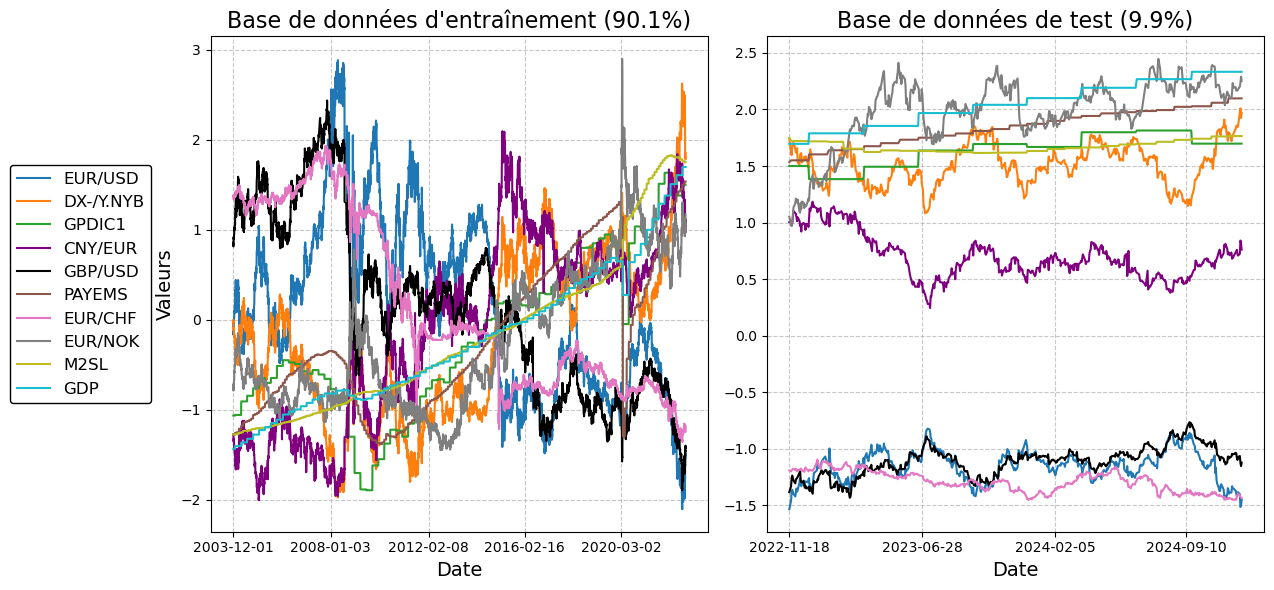

In [10]:
train_data, test_data = train_test_split(pmi_data, train_size=best_split, shuffle=False)

(X_train_retail_sales, X_train_Inflation, X_train_GDP, X_train_GPDIC1,
 X_train_indicator4, X_train_indicator5, X_train_indicator6, X_train_indicator7,
 X_train_indicator8, X_train_indicator9, X_train_indicator10,
 y_train_retail_sales, y_train_Inflation, y_train_GDP, y_train_GPDIC1,
 y_train_indicator4, y_train_indicator5, y_train_indicator6, y_train_indicator7,
 y_train_indicator8, y_train_indicator9, y_train_indicator10) = prepare_data(train_data)

(X_test_retail_sales, X_test_Inflation, X_test_GDP, X_test_GPDIC1,
 X_test_indicator4, X_test_indicator5, X_test_indicator6, X_test_indicator7,
 X_test_indicator8, X_test_indicator9, X_test_indicator10,
 y_test_retail_sales, y_test_Inflation, y_test_GDP, y_test_GPDIC1,
 y_test_indicator4, y_test_indicator5, y_test_indicator6, y_test_indicator7,
 y_test_indicator8, y_test_indicator9, y_test_indicator10) = prepare_data(test_data)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#800080', '#000000',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

train_size = len(X_train_GDP)
test_size = len(X_test_GDP)
total_size = train_size + test_size

train_pct = round(100 * train_size / total_size, 1)
test_pct = round(100 * test_size / total_size, 1)

train_dates = pmi_data['Date'][:train_size]
test_dates = pmi_data['Date'][train_size:train_size + test_size]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

train_data = [
    (X_train_retail_sales, colors[0], chosen_currency),
    (X_train_Inflation, colors[1], first_indicator),
    (X_train_GDP, colors[2], second_indicator),
    (X_train_GPDIC1, colors[3], third_indicator),
    (X_train_indicator4, colors[4], fourth_indicator),
    (X_train_indicator5, colors[5], fifth_indicator),
    (X_train_indicator6, colors[6], sixth_indicator),
    (X_train_indicator7, colors[7], seventh_indicator),
    (X_train_indicator8, colors[8], eighth_indicator),
    (X_train_indicator9, colors[9], ninth_indicator)
]

test_data = [
    X_test_retail_sales,
    X_test_Inflation,
    X_test_GDP,
    X_test_GPDIC1,
    X_test_indicator4,
    X_test_indicator5,
    X_test_indicator6,
    X_test_indicator7,
    X_test_indicator8,
    X_test_indicator9
]

for data, color, label in train_data:
    axs[0].plot(train_dates, [sample[1] for sample in data], color=color, label=label)

axs[0].set_xticks(train_dates[::1000])
axs[0].set_xlabel('Date', fontsize=14)
axs[0].set_ylabel('Valeurs', fontsize=14)
axs[0].set_title(f'Base de données d\'entraînement ({train_pct}%)', fontsize=16)
axs[0].grid(True, linestyle='--', alpha=0.7)

for i, data in enumerate(test_data):
    axs[1].plot(test_dates, [sample[1] for sample in data], color=colors[i])

axs[1].set_xticks(test_dates[::150])
axs[1].set_xlabel('Date', fontsize=14)
axs[1].set_title(f'Base de données de test ({test_pct}%)', fontsize=16)
axs[1].grid(True, linestyle='--', alpha=0.7)

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,
              loc='center left',
              bbox_to_anchor=(-0.42, 0.5),
              fontsize=12,
              frameon=True,
              fancybox=True,
              edgecolor='black',
              framealpha=1)

plt.tight_layout(rect=[0.18, 0, 1, 1])

plt.show()

In [11]:
X_train_combined_retail_sales = np.concatenate((X_train_retail_sales, X_train_Inflation,
                                              X_train_GDP, X_train_GPDIC1,
                                              X_train_indicator4, X_train_indicator5,
                                              X_train_indicator6, X_train_indicator7,
                                              X_train_indicator8, X_train_indicator9,
                                              X_train_indicator10), axis=1)

X_train_combined_Inflation = np.concatenate((X_train_Inflation, X_train_retail_sales,
                                          X_train_GDP, X_train_GPDIC1,
                                          X_train_indicator4, X_train_indicator5,
                                          X_train_indicator6, X_train_indicator7,
                                          X_train_indicator8, X_train_indicator9,
                                          X_train_indicator10), axis=1)

X_train_combined_GDP = np.concatenate((X_train_GDP, X_train_retail_sales,
                                    X_train_Inflation, X_train_GPDIC1,
                                    X_train_indicator4, X_train_indicator5,
                                    X_train_indicator6, X_train_indicator7,
                                    X_train_indicator8, X_train_indicator9,
                                    X_train_indicator10), axis=1)

X_train_combined_GPDIC1 = np.concatenate((X_train_GPDIC1, X_train_retail_sales,
                                        X_train_Inflation, X_train_GDP,
                                        X_train_indicator4, X_train_indicator5,
                                        X_train_indicator6, X_train_indicator7,
                                        X_train_indicator8, X_train_indicator9,
                                        X_train_indicator10), axis=1)

X_train_combined_indicator4 = np.concatenate((X_train_indicator4, X_train_retail_sales,
                                            X_train_Inflation, X_train_GDP, X_train_GPDIC1,
                                            X_train_indicator5, X_train_indicator6,
                                            X_train_indicator7, X_train_indicator8,
                                            X_train_indicator9, X_train_indicator10), axis=1)

X_train_combined_indicator5 = np.concatenate((X_train_indicator5, X_train_retail_sales,
                                            X_train_Inflation, X_train_GDP, X_train_GPDIC1,
                                            X_train_indicator4, X_train_indicator6,
                                            X_train_indicator7, X_train_indicator8,
                                            X_train_indicator9, X_train_indicator10), axis=1)

X_train_combined_indicator6 = np.concatenate((X_train_indicator6, X_train_retail_sales,
                                            X_train_Inflation, X_train_GDP, X_train_GPDIC1,
                                            X_train_indicator4, X_train_indicator5,
                                            X_train_indicator7, X_train_indicator8,
                                            X_train_indicator9, X_train_indicator10), axis=1)

X_train_combined_indicator7 = np.concatenate((X_train_indicator7, X_train_retail_sales,
                                            X_train_Inflation, X_train_GDP, X_train_GPDIC1,
                                            X_train_indicator4, X_train_indicator5,
                                            X_train_indicator6, X_train_indicator8,
                                            X_train_indicator9, X_train_indicator10), axis=1)

X_train_combined_indicator8 = np.concatenate((X_train_indicator8, X_train_retail_sales,
                                            X_train_Inflation, X_train_GDP, X_train_GPDIC1,
                                            X_train_indicator4, X_train_indicator5,
                                            X_train_indicator6, X_train_indicator7,
                                            X_train_indicator9, X_train_indicator10), axis=1)

X_train_combined_indicator9 = np.concatenate((X_train_indicator9, X_train_retail_sales,
                                            X_train_Inflation, X_train_GDP, X_train_GPDIC1,
                                            X_train_indicator4, X_train_indicator5,
                                            X_train_indicator6, X_train_indicator7,
                                            X_train_indicator8, X_train_indicator10), axis=1)

X_train_combined_indicator10 = np.concatenate((X_train_indicator10, X_train_retail_sales,
                                            X_train_Inflation, X_train_GDP, X_train_GPDIC1,
                                            X_train_indicator4, X_train_indicator5,
                                            X_train_indicator6, X_train_indicator7,
                                            X_train_indicator8, X_train_indicator9), axis=1)


model_retail_sales = LinearRegression()
model_retail_sales.fit(X_train_combined_retail_sales, y_train_retail_sales)

model_Inflation = LinearRegression()
model_Inflation.fit(X_train_combined_Inflation, y_train_Inflation)

model_GDP = LinearRegression()
model_GDP.fit(X_train_combined_GDP, y_train_GDP)

model_GPDIC1 = LinearRegression()
model_GPDIC1.fit(X_train_combined_GPDIC1, y_train_GPDIC1)

model_indicator4 = LinearRegression()
model_indicator4.fit(X_train_combined_indicator4, y_train_indicator4)

model_indicator5 = LinearRegression()
model_indicator5.fit(X_train_combined_indicator5, y_train_indicator5)

model_indicator6 = LinearRegression()
model_indicator6.fit(X_train_combined_indicator6, y_train_indicator6)

model_indicator7 = LinearRegression()
model_indicator7.fit(X_train_combined_indicator7, y_train_indicator7)

model_indicator8 = LinearRegression()
model_indicator8.fit(X_train_combined_indicator8, y_train_indicator8)

model_indicator9 = LinearRegression()
model_indicator9.fit(X_train_combined_indicator9, y_train_indicator9)

model_indicator10 = LinearRegression()
model_indicator10.fit(X_train_combined_indicator10, y_train_indicator10)


y_train_pred_retail_sales = model_retail_sales.predict(X_train_combined_retail_sales)

y_train_pred_Inflation = model_Inflation.predict(X_train_combined_Inflation)

y_train_pred_GDP = model_GDP.predict(X_train_combined_GDP)

y_train_pred_GPDIC1 = model_GPDIC1.predict(X_train_combined_GPDIC1)

y_train_pred_indicator4 = model_indicator4.predict(X_train_combined_indicator4)

y_train_pred_indicator5 = model_indicator5.predict(X_train_combined_indicator5)

y_train_pred_indicator6 = model_indicator6.predict(X_train_combined_indicator6)

y_train_pred_indicator7 = model_indicator7.predict(X_train_combined_indicator7)

y_train_pred_indicator8 = model_indicator8.predict(X_train_combined_indicator8)

y_train_pred_indicator9 = model_indicator9.predict(X_train_combined_indicator9)

y_train_pred_indicator10 = model_indicator10.predict(X_train_combined_indicator10)

np.set_printoptions(suppress=True)

train_rmse_retail_sales = np.sqrt(mean_squared_error(y_train_retail_sales, y_train_pred_retail_sales))
train_r2_retail_sales = r2_score(y_train_retail_sales, y_train_pred_retail_sales)
train_mae_retail_sales = mean_absolute_error(y_train_retail_sales, y_train_pred_retail_sales)

train_rmse_Inflation = np.sqrt(mean_squared_error(y_train_Inflation, y_train_pred_Inflation))
train_r2_Inflation = r2_score(y_train_Inflation, y_train_pred_Inflation)
train_mae_Inflation = mean_absolute_error(y_train_Inflation, y_train_pred_Inflation)

train_rmse_GDP = np.sqrt(mean_squared_error(y_train_GDP, y_train_pred_GDP))
train_r2_GDP = r2_score(y_train_GDP, y_train_pred_GDP)
train_mae_GDP = mean_absolute_error(y_train_GDP, y_train_pred_GDP)

train_rmse_GPDIC1 = np.sqrt(mean_squared_error(y_train_GPDIC1, y_train_pred_GPDIC1))
train_r2_GPDIC1 = r2_score(y_train_GPDIC1, y_train_pred_GPDIC1)
train_mae_GPDIC1 = mean_absolute_error(y_train_GPDIC1, y_train_pred_GPDIC1)

train_rmse_indicator4 = np.sqrt(mean_squared_error(y_train_indicator4, y_train_pred_indicator4))
train_r2_indicator4 = r2_score(y_train_indicator4, y_train_pred_indicator4)
train_mae_indicator4 = mean_absolute_error(y_train_indicator4, y_train_pred_indicator4)

train_rmse_indicator5 = np.sqrt(mean_squared_error(y_train_indicator5, y_train_pred_indicator5))
train_r2_indicator5 = r2_score(y_train_indicator5, y_train_pred_indicator5)
train_mae_indicator5 = mean_absolute_error(y_train_indicator5, y_train_pred_indicator5)

train_rmse_indicator6 = np.sqrt(mean_squared_error(y_train_indicator6, y_train_pred_indicator6))
train_r2_indicator6 = r2_score(y_train_indicator6, y_train_pred_indicator6)
train_mae_indicator6 = mean_absolute_error(y_train_indicator6, y_train_pred_indicator6)

train_rmse_indicator7 = np.sqrt(mean_squared_error(y_train_indicator7, y_train_pred_indicator7))
train_r2_indicator7 = r2_score(y_train_indicator7, y_train_pred_indicator7)
train_mae_indicator7 = mean_absolute_error(y_train_indicator7, y_train_pred_indicator7)

train_rmse_indicator8 = np.sqrt(mean_squared_error(y_train_indicator8, y_train_pred_indicator8))
train_r2_indicator8 = r2_score(y_train_indicator8, y_train_pred_indicator8)
train_mae_indicator8 = mean_absolute_error(y_train_indicator8, y_train_pred_indicator8)

train_rmse_indicator9 = np.sqrt(mean_squared_error(y_train_indicator9, y_train_pred_indicator9))
train_r2_indicator9 = r2_score(y_train_indicator9, y_train_pred_indicator9)
train_mae_indicator9 = mean_absolute_error(y_train_indicator9, y_train_pred_indicator9)

train_rmse_indicator10 = np.sqrt(mean_squared_error(y_train_indicator10, y_train_pred_indicator10))
train_r2_indicator10 = r2_score(y_train_indicator10, y_train_pred_indicator10)
train_mae_indicator10 = mean_absolute_error(y_train_indicator10, y_train_pred_indicator10)

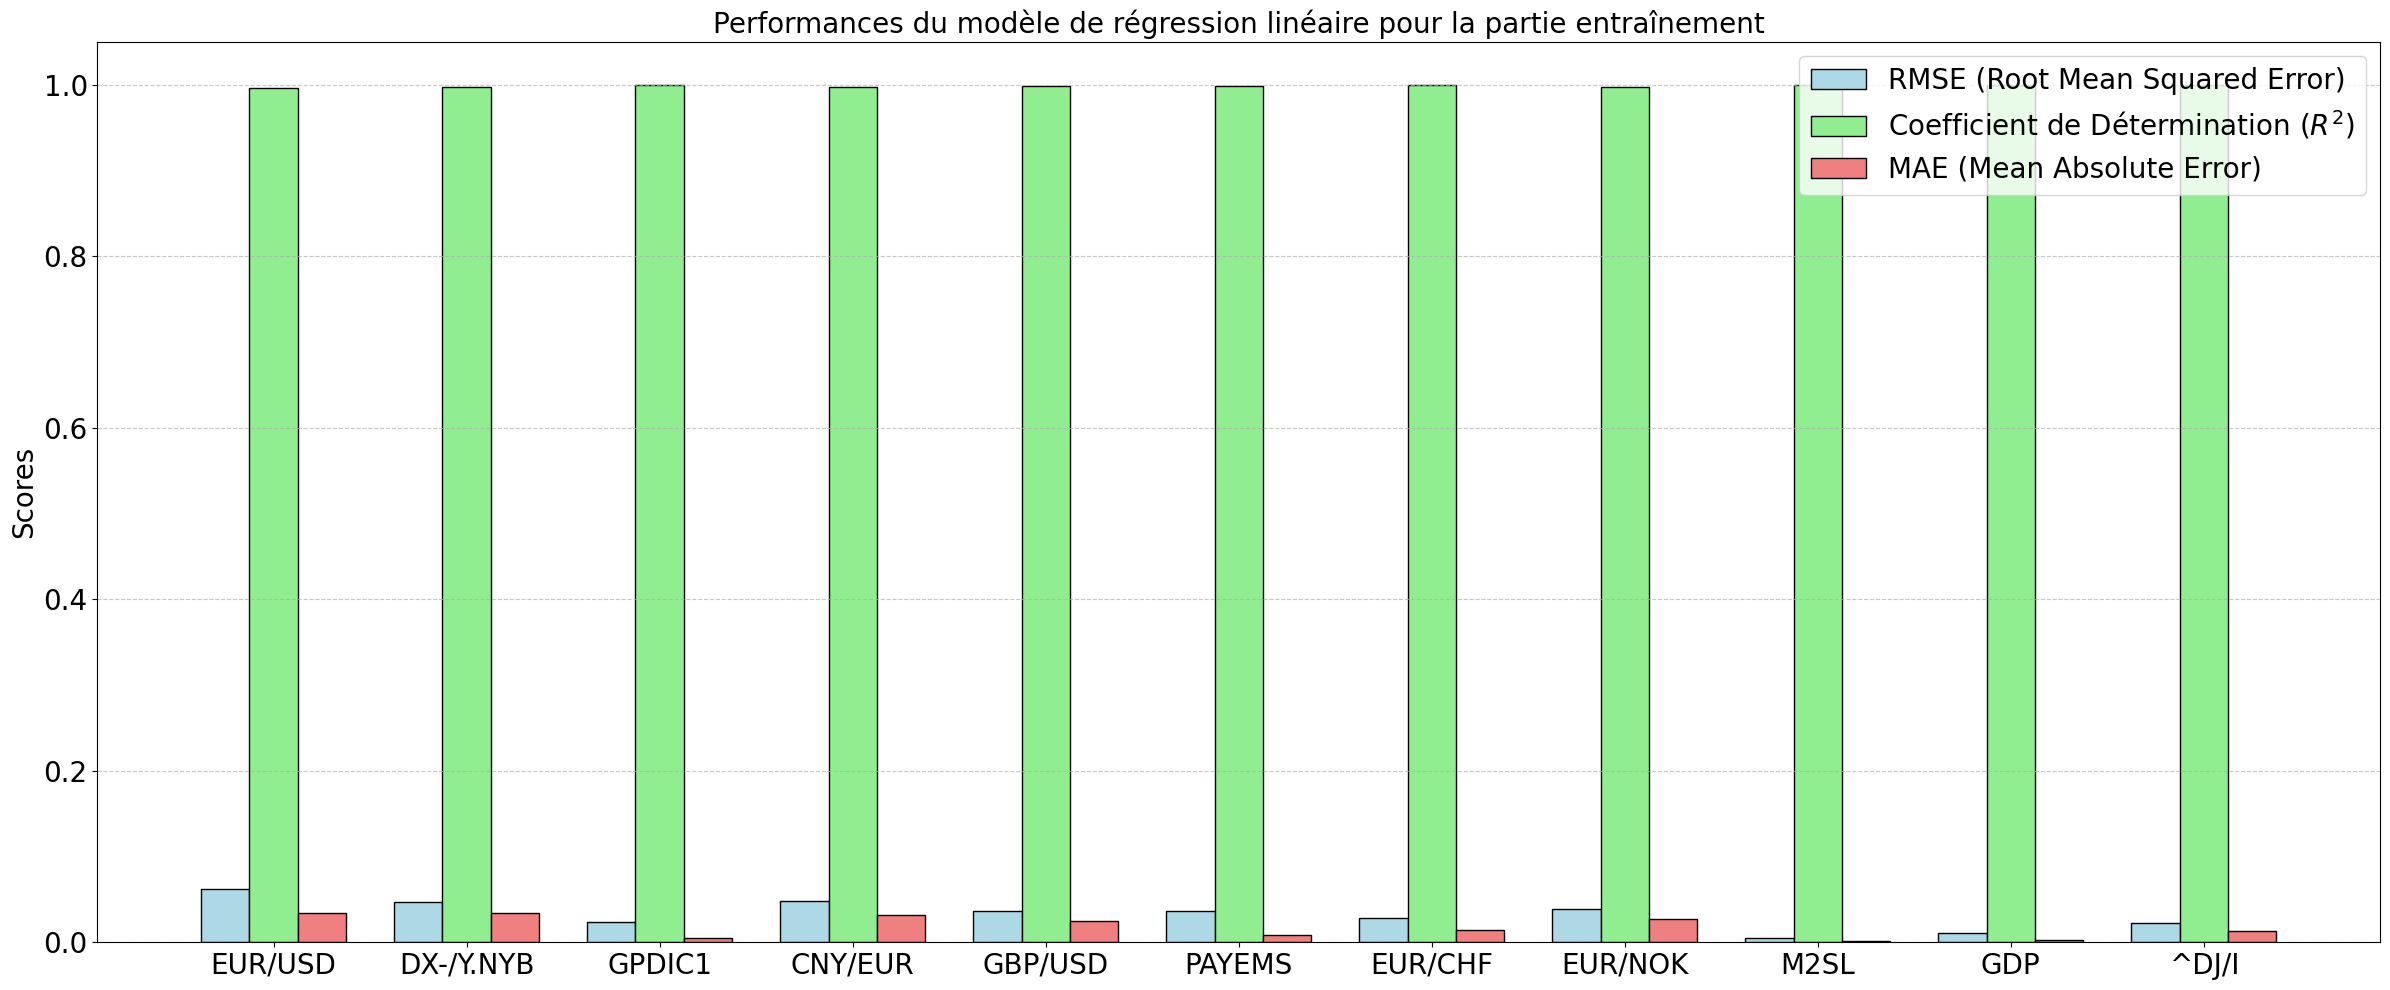

In [12]:
models = [chosen_currency, first_indicator, second_indicator, third_indicator,
          fourth_indicator, fifth_indicator, sixth_indicator, seventh_indicator,
          eighth_indicator, ninth_indicator, tenth_indicator]

rmse_scores = [train_rmse_retail_sales, train_rmse_Inflation, train_rmse_GDP, train_rmse_GPDIC1,
               train_rmse_indicator4, train_rmse_indicator5, train_rmse_indicator6, train_rmse_indicator7,
               train_rmse_indicator8, train_rmse_indicator9, train_rmse_indicator10]

r2_scores = [train_r2_retail_sales, train_r2_Inflation, train_r2_GDP, train_r2_GPDIC1,
             train_r2_indicator4, train_r2_indicator5, train_r2_indicator6, train_r2_indicator7,
             train_r2_indicator8, train_r2_indicator9, train_r2_indicator10]

mae_scores = [train_mae_retail_sales, train_mae_Inflation, train_mae_GDP, train_mae_GPDIC1,
              train_mae_indicator4, train_mae_indicator5, train_mae_indicator6, train_mae_indicator7,
              train_mae_indicator8, train_mae_indicator9, train_mae_indicator10]

bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(24, 10))

plt.bar(index - bar_width, rmse_scores, bar_width, label='RMSE (Root Mean Squared Error)', 
        color='lightblue', edgecolor='black')
plt.bar(index, r2_scores, bar_width, label=r'Coefficient de Détermination ($R^2$)', 
        color='lightgreen', edgecolor='black')
plt.bar(index + bar_width, mae_scores, bar_width, label='MAE (Mean Absolute Error)', 
        color='lightcoral', edgecolor='black')

# On affiche directement les noms de variables sans mapping
plt.ylabel('Scores', fontsize=20)
plt.title('Performances du modèle de régression linéaire pour la partie entraînement', fontsize=20)
plt.xticks(index, models, fontsize=20, rotation=0, ha='center')
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

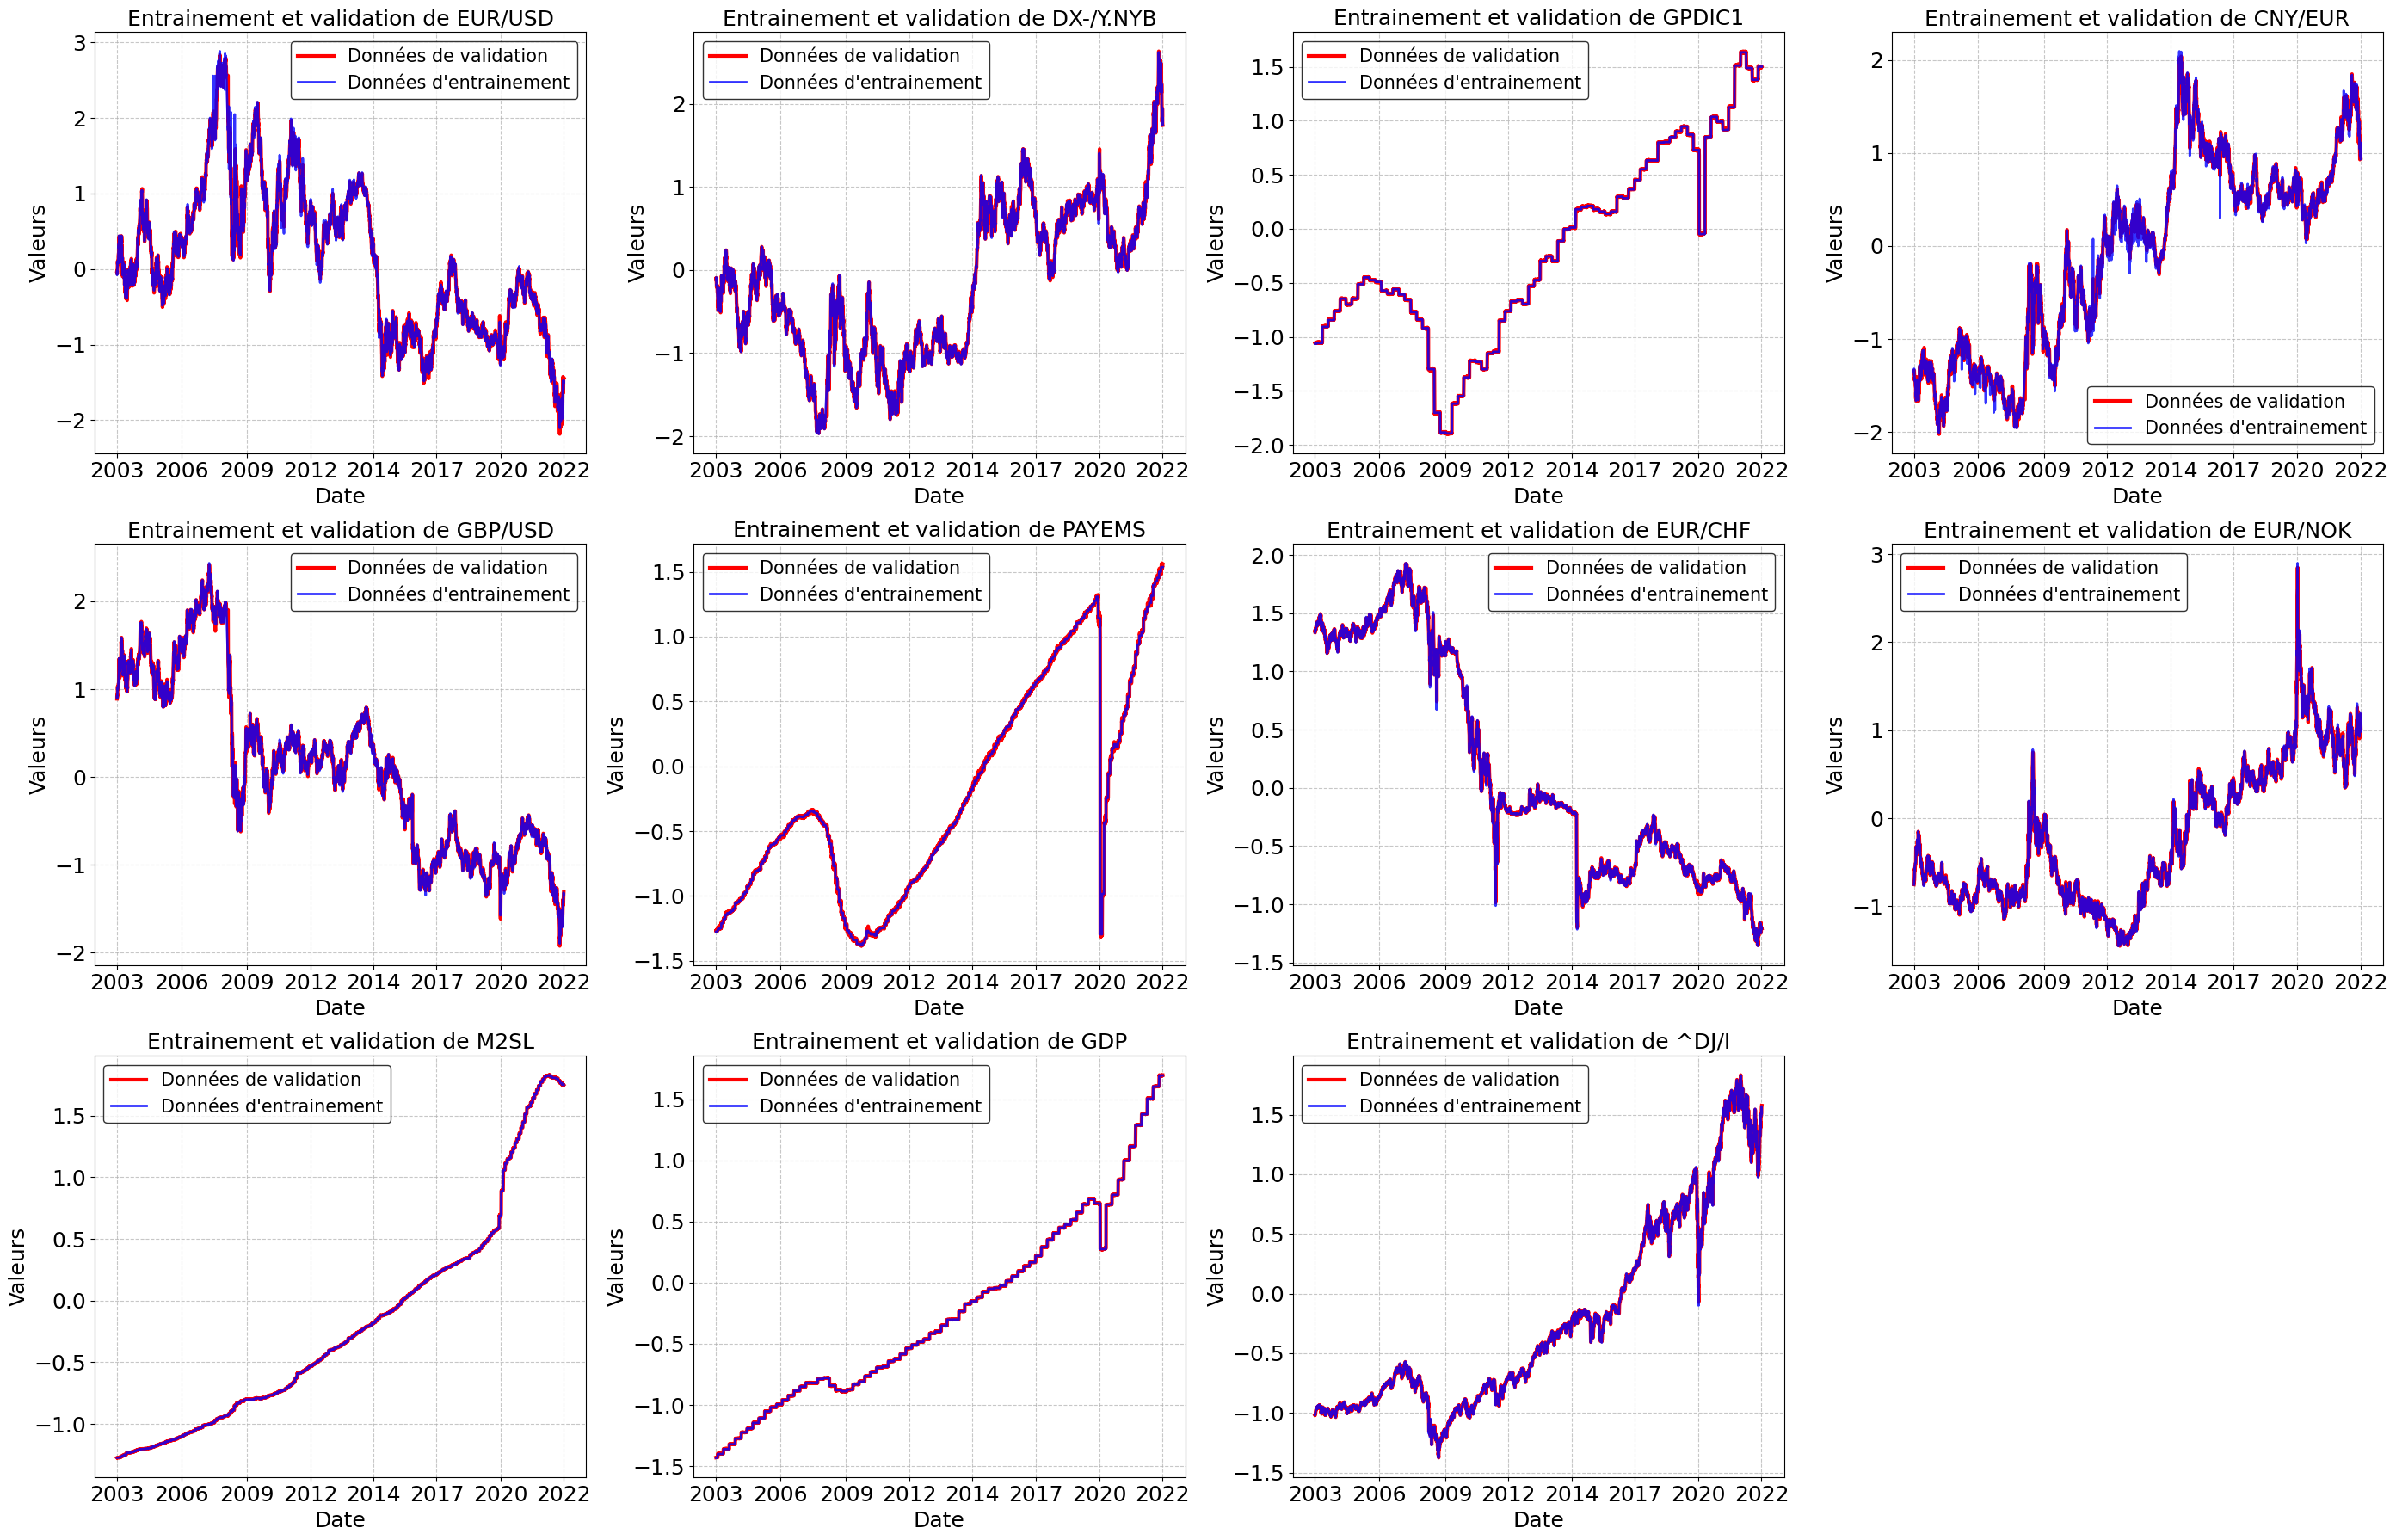

In [13]:
pmi_data_nv = pmi_data.iloc[6:].copy()
pmi_data_nv['Date'] = pd.to_datetime(pmi_data_nv['Date'])

dates_train = pmi_data_nv['Date'][:len(y_train_pred_GDP)]
sampled_dates = dates_train[::len(dates_train)//7]

plots_config = [
    (chosen_currency, y_train_pred_retail_sales, chosen_currency),
    (first_indicator, y_train_pred_Inflation, first_indicator),
    (second_indicator, y_train_pred_GDP, second_indicator),
    (third_indicator, y_train_pred_GPDIC1, third_indicator),
    (fourth_indicator, y_train_pred_indicator4, fourth_indicator),
    (fifth_indicator, y_train_pred_indicator5, fifth_indicator),
    (sixth_indicator, y_train_pred_indicator6, sixth_indicator),
    (seventh_indicator, y_train_pred_indicator7, seventh_indicator),
    (eighth_indicator, y_train_pred_indicator8, eighth_indicator),
    (ninth_indicator, y_train_pred_indicator9, ninth_indicator),
    (tenth_indicator, y_train_pred_indicator10, tenth_indicator),]

n_cols = 4
n_rows = (len(plots_config) + n_cols - 1) // n_cols
plt.figure(figsize=(28, 6 * n_rows))

for i, (title, y_pred, col) in enumerate(plots_config, start=1):
    plt.subplot(n_rows, n_cols, i)
    
    plt.plot(dates_train, y_pred, label='Données de validation', 
             color='red', linestyle='-', linewidth=3)
    plt.plot(dates_train, pmi_data_nv[col][:len(y_pred)], 
             label="Données d'entrainement", color='blue', linewidth=2, alpha=0.8)
    
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Valeurs', fontsize=18)
    plt.title(f'Entrainement et validation de {title}', fontsize=18)
    plt.legend(edgecolor='black', fontsize=15)
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xticks(sampled_dates)
    
    plt.xticks(rotation=0, fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


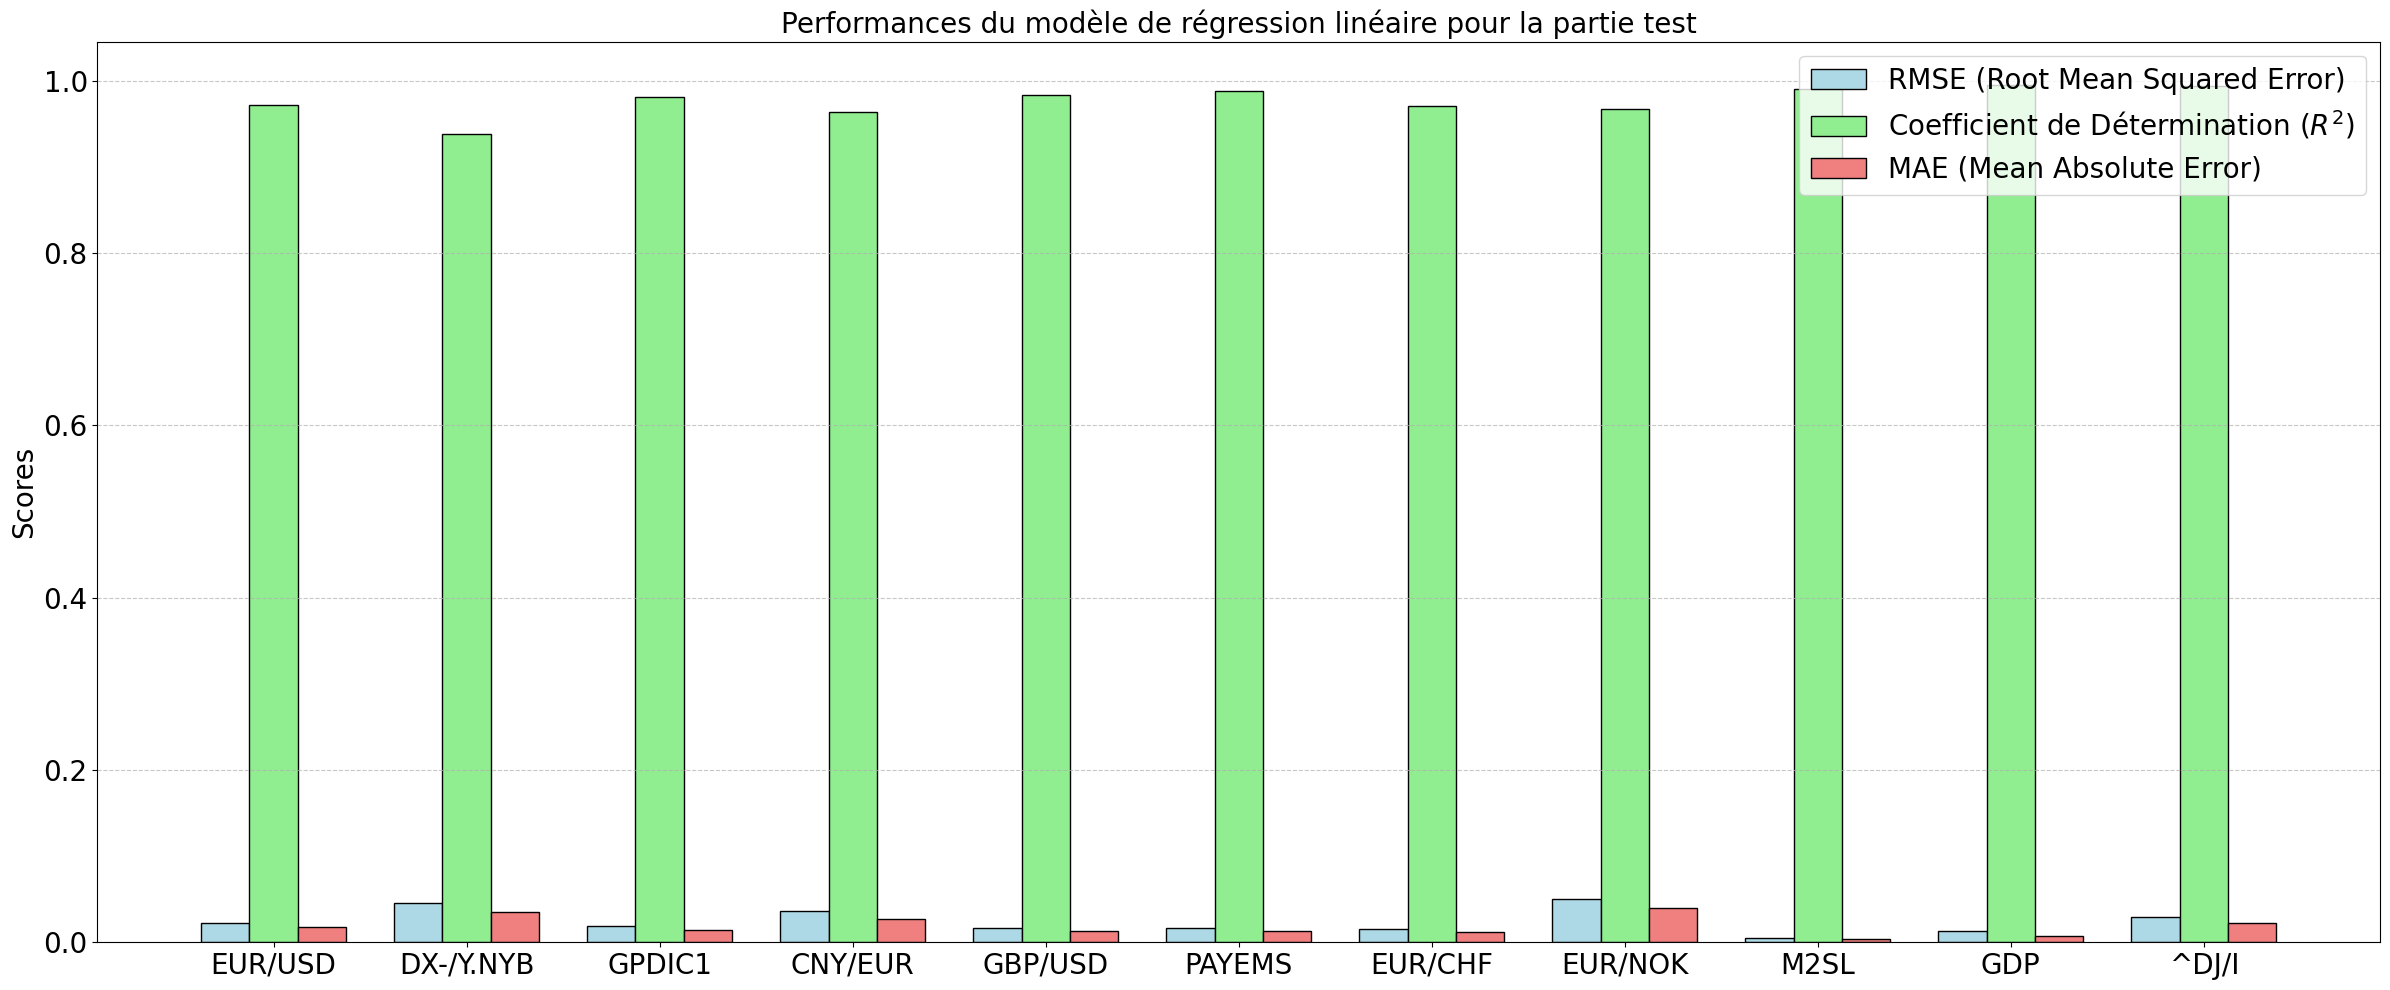

In [14]:
X_test_combined_retail_sales = np.concatenate((X_test_retail_sales, X_test_Inflation,
                                              X_test_GDP, X_test_GPDIC1,
                                              X_test_indicator4, X_test_indicator5,
                                              X_test_indicator6, X_test_indicator7,
                                              X_test_indicator8, X_test_indicator9,
                                              X_test_indicator10), axis=1)

X_test_combined_Inflation = np.concatenate((X_test_Inflation, X_test_retail_sales,
                                          X_test_GDP, X_test_GPDIC1,
                                          X_test_indicator4, X_test_indicator5,
                                          X_test_indicator6, X_test_indicator7,
                                          X_test_indicator8, X_test_indicator9,
                                          X_test_indicator10), axis=1)

X_test_combined_GDP = np.concatenate((X_test_GDP, X_test_retail_sales,
                                    X_test_Inflation, X_test_GPDIC1,
                                    X_test_indicator4, X_test_indicator5,
                                    X_test_indicator6, X_test_indicator7,
                                    X_test_indicator8, X_test_indicator9,
                                    X_test_indicator10), axis=1)

X_test_combined_GPDIC1 = np.concatenate((X_test_GPDIC1, X_test_retail_sales,
                                       X_test_Inflation, X_test_GDP,
                                       X_test_indicator4, X_test_indicator5,
                                       X_test_indicator6, X_test_indicator7,
                                       X_test_indicator8, X_test_indicator9,
                                       X_test_indicator10), axis=1)

X_test_combined_indicator4 = np.concatenate((X_test_indicator4, X_test_retail_sales,
                                           X_test_Inflation, X_test_GDP, X_test_GPDIC1,
                                           X_test_indicator5, X_test_indicator6,
                                           X_test_indicator7, X_test_indicator8,
                                           X_test_indicator9, X_test_indicator10), axis=1)

X_test_combined_indicator5 = np.concatenate((X_test_indicator5, X_test_retail_sales,
                                           X_test_Inflation, X_test_GDP, X_test_GPDIC1,
                                           X_test_indicator4, X_test_indicator6,
                                           X_test_indicator7, X_test_indicator8,
                                           X_test_indicator9, X_test_indicator10), axis=1)

X_test_combined_indicator6 = np.concatenate((X_test_indicator6, X_test_retail_sales,
                                           X_test_Inflation, X_test_GDP, X_test_GPDIC1,
                                           X_test_indicator4, X_test_indicator5,
                                           X_test_indicator7, X_test_indicator8,
                                           X_test_indicator9, X_test_indicator10), axis=1)

X_test_combined_indicator7 = np.concatenate((X_test_indicator7, X_test_retail_sales,
                                           X_test_Inflation, X_test_GDP, X_test_GPDIC1,
                                           X_test_indicator4, X_test_indicator5,
                                           X_test_indicator6, X_test_indicator8,
                                           X_test_indicator9, X_test_indicator10), axis=1)

X_test_combined_indicator8 = np.concatenate((X_test_indicator8, X_test_retail_sales,
                                           X_test_Inflation, X_test_GDP, X_test_GPDIC1,
                                           X_test_indicator4, X_test_indicator5,
                                           X_test_indicator6, X_test_indicator7,
                                           X_test_indicator9, X_test_indicator10), axis=1)

X_test_combined_indicator9 = np.concatenate((X_test_indicator9, X_test_retail_sales,
                                           X_test_Inflation, X_test_GDP, X_test_GPDIC1,
                                           X_test_indicator4, X_test_indicator5,
                                           X_test_indicator6, X_test_indicator7,
                                           X_test_indicator8, X_test_indicator10), axis=1)

X_test_combined_indicator10 = np.concatenate((X_test_indicator10, X_test_retail_sales,
                                            X_test_Inflation, X_test_GDP, X_test_GPDIC1,
                                            X_test_indicator4, X_test_indicator5,
                                            X_test_indicator6, X_test_indicator7,
                                            X_test_indicator8, X_test_indicator9), axis=1)

y_pred_combined_retail_sales = model_retail_sales.predict(X_test_combined_retail_sales)

y_pred_combined_Inflation = model_Inflation.predict(X_test_combined_Inflation)

y_pred_combined_GDP = model_GDP.predict(X_test_combined_GDP)

y_pred_combined_GPDIC1 = model_GPDIC1.predict(X_test_combined_GPDIC1)

y_pred_combined_indicator4 = model_indicator4.predict(X_test_combined_indicator4)

y_pred_combined_indicator5 = model_indicator5.predict(X_test_combined_indicator5)

y_pred_combined_indicator6 = model_indicator6.predict(X_test_combined_indicator6)

y_pred_combined_indicator7 = model_indicator7.predict(X_test_combined_indicator7)

y_pred_combined_indicator8 = model_indicator8.predict(X_test_combined_indicator8)

y_pred_combined_indicator9 = model_indicator9.predict(X_test_combined_indicator9)

y_pred_combined_indicator10 = model_indicator10.predict(X_test_combined_indicator10)


mse_retail_sales = mean_squared_error(y_test_retail_sales, y_pred_combined_retail_sales)
mae_retail_sales = mean_absolute_error(y_test_retail_sales, y_pred_combined_retail_sales)
r2_retail_sales = r2_score(y_test_retail_sales, y_pred_combined_retail_sales)

mse_Inflation = mean_squared_error(y_test_Inflation, y_pred_combined_Inflation)
mae_Inflation = mean_absolute_error(y_test_Inflation, y_pred_combined_Inflation)
r2_Inflation = r2_score(y_test_Inflation, y_pred_combined_Inflation)

mse_GDP = mean_squared_error(y_test_GDP, y_pred_combined_GDP)
mae_GDP = mean_absolute_error(y_test_GDP, y_pred_combined_GDP)
r2_GDP = r2_score(y_test_GDP, y_pred_combined_GDP)

rmse_GPDIC1 = np.sqrt(mean_squared_error(y_test_GPDIC1, y_pred_combined_GPDIC1))
r2_GPDIC1 = r2_score(y_test_GPDIC1, y_pred_combined_GPDIC1)
mae_GPDIC1 = mean_absolute_error(y_test_GPDIC1, y_pred_combined_GPDIC1)

rmse_indicator4 = np.sqrt(mean_squared_error(y_test_indicator4, y_pred_combined_indicator4))
r2_indicator4 = r2_score(y_test_indicator4, y_pred_combined_indicator4)
mae_indicator4 = mean_absolute_error(y_test_indicator4, y_pred_combined_indicator4)

rmse_indicator5 = np.sqrt(mean_squared_error(y_test_indicator5, y_pred_combined_indicator5))
r2_indicator5 = r2_score(y_test_indicator5, y_pred_combined_indicator5)
mae_indicator5 = mean_absolute_error(y_test_indicator5, y_pred_combined_indicator5)

rmse_indicator6 = np.sqrt(mean_squared_error(y_test_indicator6, y_pred_combined_indicator6))
r2_indicator6 = r2_score(y_test_indicator6, y_pred_combined_indicator6)
mae_indicator6 = mean_absolute_error(y_test_indicator6, y_pred_combined_indicator6)

rmse_indicator7 = np.sqrt(mean_squared_error(y_test_indicator7, y_pred_combined_indicator7))
r2_indicator7 = r2_score(y_test_indicator7, y_pred_combined_indicator7)
mae_indicator7 = mean_absolute_error(y_test_indicator7, y_pred_combined_indicator7)

rmse_indicator8 = np.sqrt(mean_squared_error(y_test_indicator8, y_pred_combined_indicator8))
r2_indicator8 = r2_score(y_test_indicator8, y_pred_combined_indicator8)
mae_indicator8 = mean_absolute_error(y_test_indicator8, y_pred_combined_indicator8)

rmse_indicator9 = np.sqrt(mean_squared_error(y_test_indicator9, y_pred_combined_indicator9))
r2_indicator9 = r2_score(y_test_indicator9, y_pred_combined_indicator9)
mae_indicator9 = mean_absolute_error(y_test_indicator9, y_pred_combined_indicator9)

rmse_indicator10 = np.sqrt(mean_squared_error(y_test_indicator10, y_pred_combined_indicator10))
r2_indicator10 = r2_score(y_test_indicator10, y_pred_combined_indicator10)
mae_indicator10 = mean_absolute_error(y_test_indicator10, y_pred_combined_indicator10)


rmse_scores = [np.sqrt(mse_retail_sales), np.sqrt(mse_Inflation), np.sqrt(mse_GDP), rmse_GPDIC1,
               rmse_indicator4, rmse_indicator5, rmse_indicator6, rmse_indicator7,
               rmse_indicator8, rmse_indicator9, rmse_indicator10]

r2_scores = [r2_retail_sales, r2_Inflation, r2_GDP, r2_GPDIC1,
             r2_indicator4, r2_indicator5, r2_indicator6, r2_indicator7,
             r2_indicator8, r2_indicator9, r2_indicator10]

mae_scores = [mae_retail_sales, mae_Inflation, mae_GDP, mae_GPDIC1,
              mae_indicator4, mae_indicator5, mae_indicator6, mae_indicator7,
              mae_indicator8, mae_indicator9, mae_indicator10]

models = [chosen_currency, first_indicator, second_indicator, third_indicator,
          fourth_indicator, fifth_indicator, sixth_indicator, seventh_indicator,
          eighth_indicator, ninth_indicator, tenth_indicator]


bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(24, 10))

plt.bar(index - bar_width, rmse_scores, bar_width, label='RMSE (Root Mean Squared Error)', 
        color='lightblue', edgecolor='black')
plt.bar(index, r2_scores, bar_width, label=r'Coefficient de Détermination ($R^2$)', 
        color='lightgreen', edgecolor='black')
plt.bar(index + bar_width, mae_scores, bar_width, label='MAE (Mean Absolute Error)', 
        color='lightcoral', edgecolor='black')

plt.ylabel('Scores', fontsize=20)
plt.title('Performances du modèle de régression linéaire pour la partie test', fontsize=20)
plt.xticks(index, models, fontsize=20, rotation=0, ha='center')
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


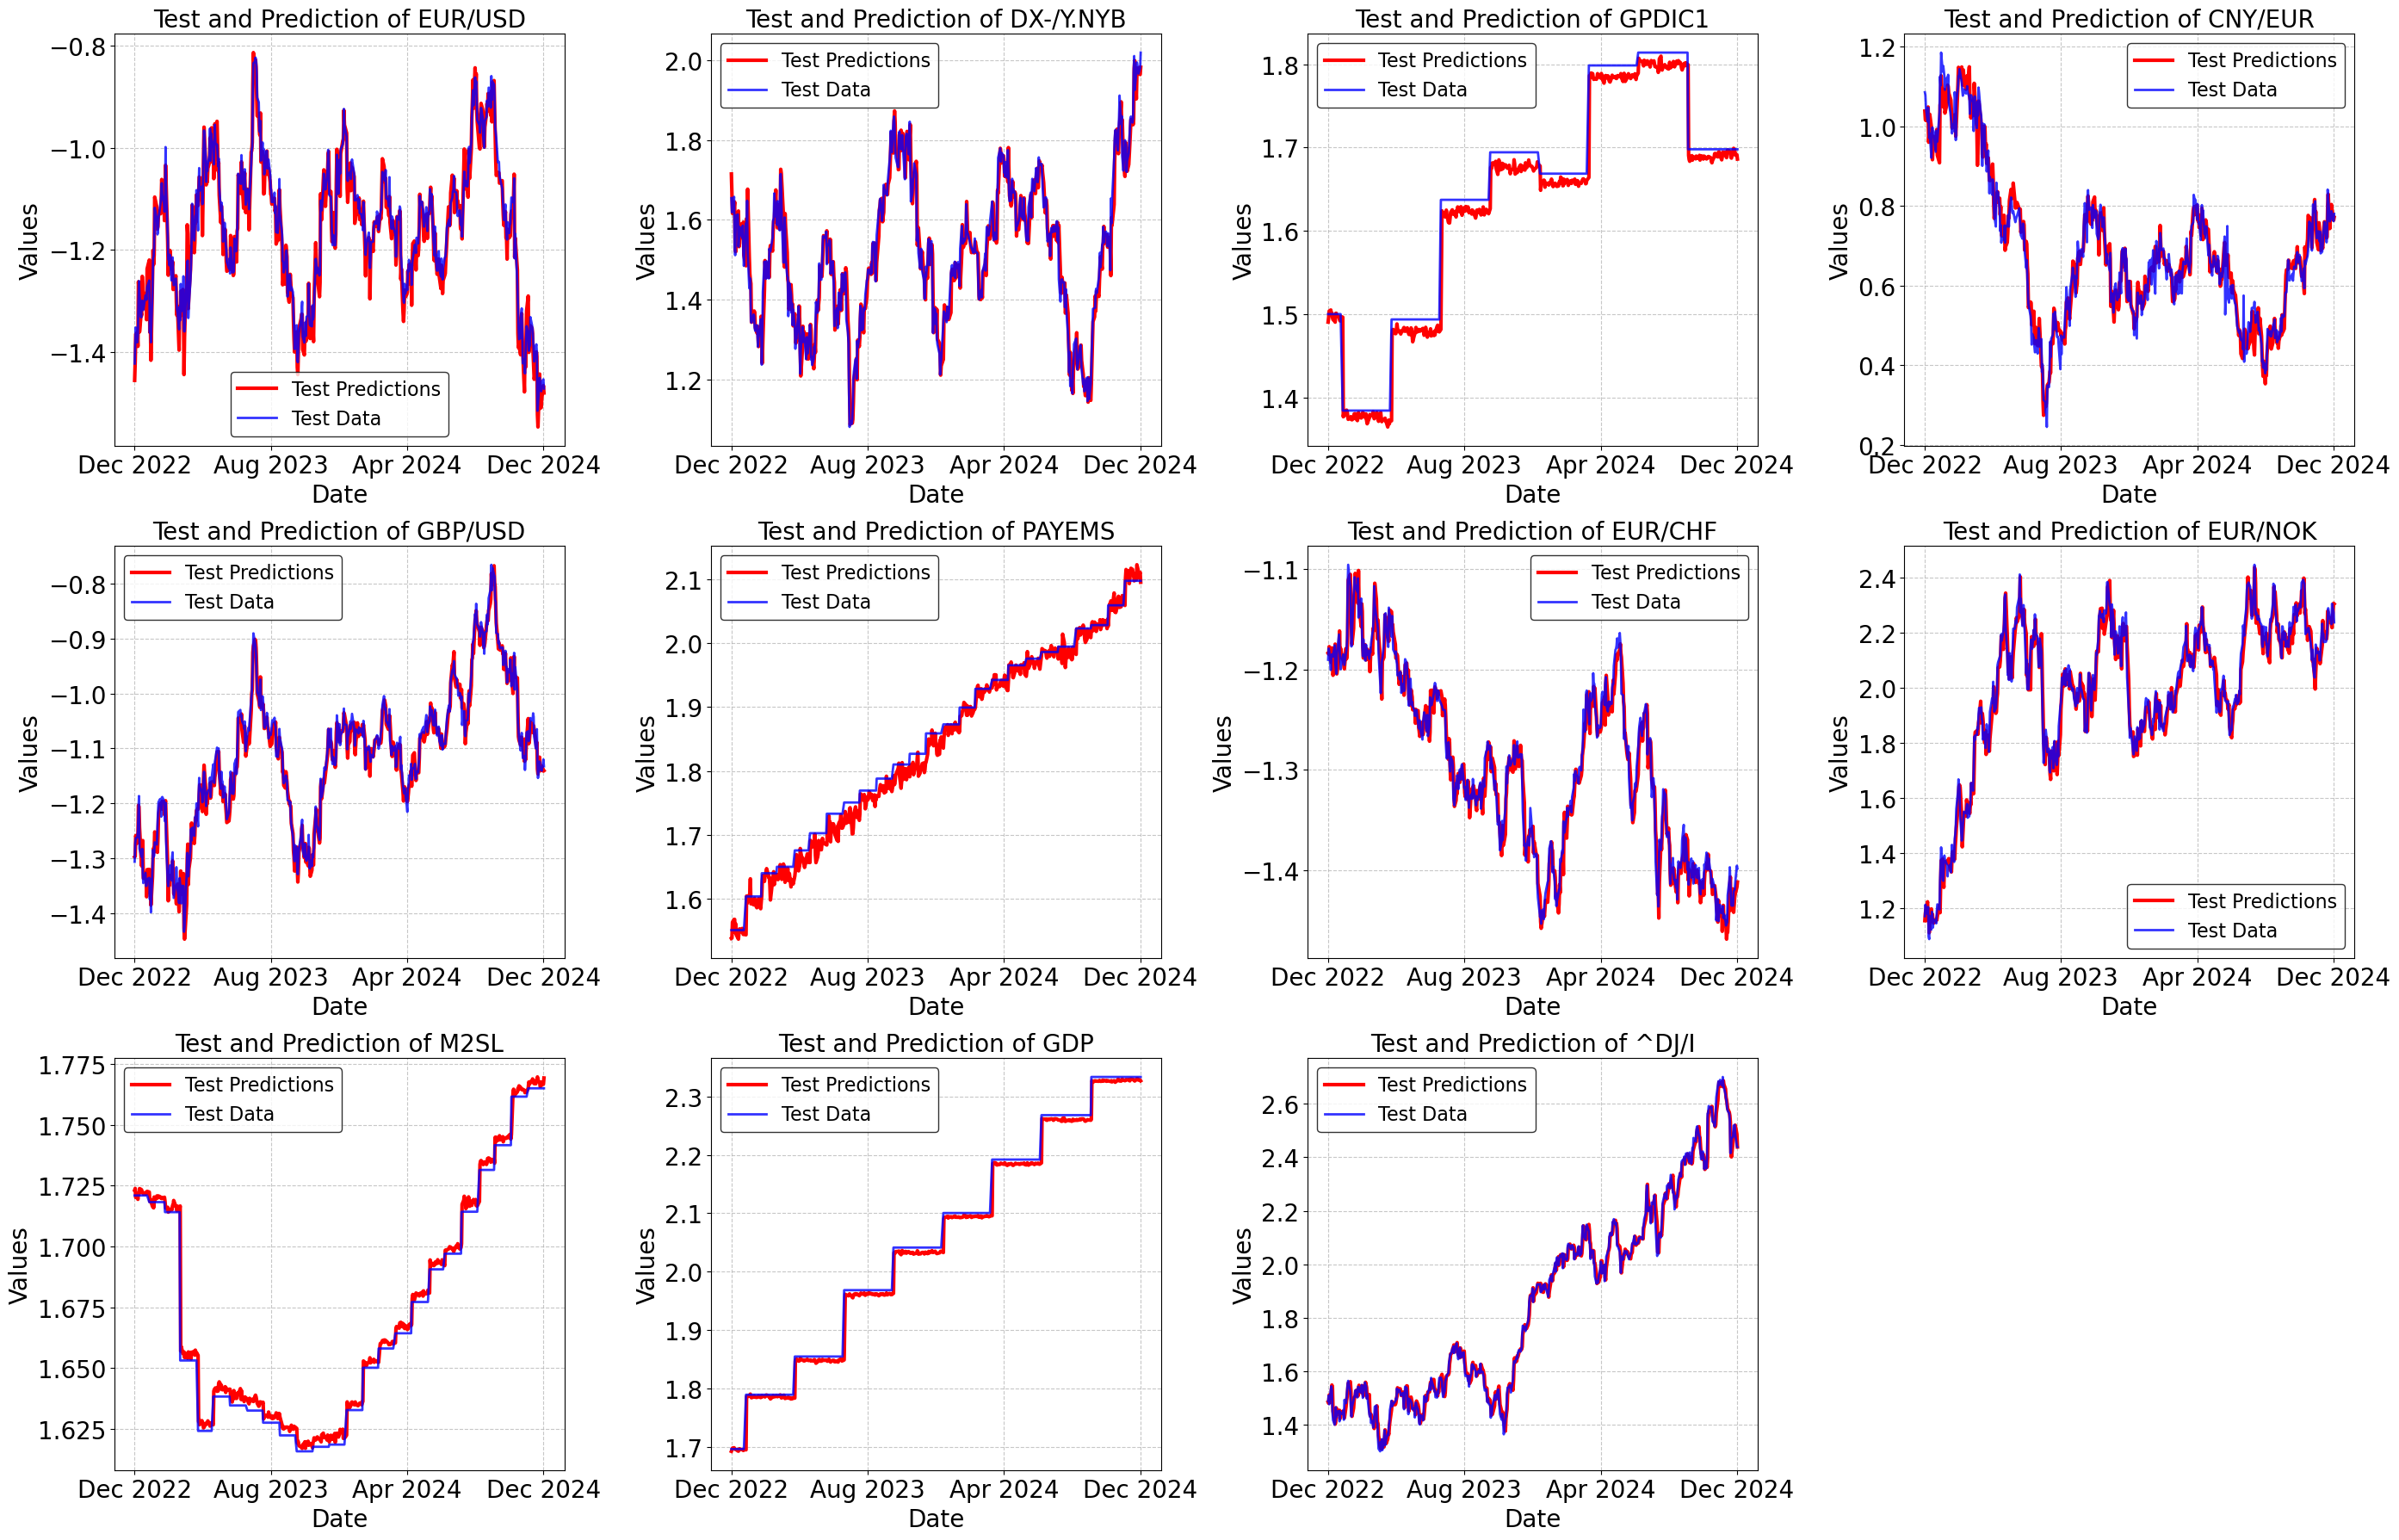

In [15]:

len_test = len(y_test_GDP)
dates_test = pmi_data_nv['Date'][-len_test:]
first_dates_test = dates_test[::len_test // 20]

start_date = first_dates_test.iloc[0]
pmi_data_test = pmi_data_nv[pmi_data_nv['Date'] >= start_date].reset_index(drop=True)

indicators_data = [
    (chosen_currency, y_pred_combined_retail_sales),
    (first_indicator, y_pred_combined_Inflation),
    (second_indicator, y_pred_combined_GDP),
    (third_indicator, y_pred_combined_GPDIC1),
    (fourth_indicator, y_pred_combined_indicator4),
    (fifth_indicator, y_pred_combined_indicator5),
    (sixth_indicator, y_pred_combined_indicator6),
    (seventh_indicator, y_pred_combined_indicator7),
    (eighth_indicator, y_pred_combined_indicator8),
    (ninth_indicator, y_pred_combined_indicator9),
    (tenth_indicator, y_pred_combined_indicator10),
]

n_cols = 4
n_rows = (len(indicators_data) + n_cols - 1) // n_cols

plt.figure(figsize=(28, 6 * n_rows))

sampled_dates_test = dates_test[::len(dates_test) // 3]

for i, (indicator, y_pred) in enumerate(indicators_data, start=1):
    ax = plt.subplot(n_rows, n_cols, i)

    ax.plot(dates_test, y_pred, label='Test Predictions', color='red', linestyle='-', linewidth=3)
    ax.plot(dates_test, pmi_data_test[indicator], label='Test Data', color='blue', linewidth=2, alpha=0.8)

    ax.set_title(f'Test and Prediction of {indicator}', fontsize=20)
    ax.set_xlabel('Date', fontsize=20)
    ax.set_ylabel('Values', fontsize=20)
    ax.legend(edgecolor='black', fontsize=16)

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', labelsize=20)
    ax.set_xticks(sampled_dates_test)

    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='y', labelsize=20)

for j in range(len(indicators_data) + 1, n_rows * n_cols + 1):
    plt.subplot(n_rows, n_cols, j)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [16]:
end_date = pmi_data['Date'].max()
end_date += timedelta(days=5)

def predict_future_values(model_retail_sales, model_Inflation, model_GDP, model_GPDIC1,
                         model_indicator4, model_indicator5, model_indicator6, model_indicator7,
                         model_indicator8, model_indicator9, model_indicator10,
                         start_date, end_date, pmi_data):
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    past_data = pmi_data.iloc[-6:]

    past_retail_sales = past_data[chosen_currency].values.tolist()
    past_Inflation = past_data[first_indicator].values.tolist()
    past_GDP = past_data[second_indicator].values.tolist()
    past_GPDIC1 = past_data[third_indicator].values.tolist()
    past_indicator4 = past_data[fourth_indicator].values.tolist()
    past_indicator5 = past_data[fifth_indicator].values.tolist()
    past_indicator6 = past_data[sixth_indicator].values.tolist()
    past_indicator7 = past_data[seventh_indicator].values.tolist()
    past_indicator8 = past_data[eighth_indicator].values.tolist()
    past_indicator9 = past_data[ninth_indicator].values.tolist()
    past_indicator10 = past_data[tenth_indicator].values.tolist()

    last_historical_row = pmi_data.iloc[-1]
    last_historical_date = pmi_data['Date'].iloc[-1]

    predictions = {
        chosen_currency: [last_historical_row[chosen_currency]],
        first_indicator: [last_historical_row[first_indicator]],
        second_indicator: [last_historical_row[second_indicator]],
        third_indicator: [last_historical_row[third_indicator]],
        fourth_indicator: [last_historical_row[fourth_indicator]],
        fifth_indicator: [last_historical_row[fifth_indicator]],
        sixth_indicator: [last_historical_row[sixth_indicator]],
        seventh_indicator: [last_historical_row[seventh_indicator]],
        eighth_indicator: [last_historical_row[eighth_indicator]],
        ninth_indicator: [last_historical_row[ninth_indicator]],
        tenth_indicator: [last_historical_row[tenth_indicator]]
    }

    for date in future_dates:
        future_pred_retail_sales = model_retail_sales.predict(np.concatenate((
            past_retail_sales, past_Inflation, past_GDP, past_GPDIC1,
            past_indicator4, past_indicator5, past_indicator6, past_indicator7,
            past_indicator8, past_indicator9, past_indicator10)).reshape(1, -1))

        future_pred_Inflation = model_Inflation.predict(np.concatenate((past_Inflation, past_retail_sales, past_GDP, past_GPDIC1, past_indicator4, past_indicator5, past_indicator6, past_indicator7, past_indicator8, past_indicator9, past_indicator10)).reshape(1, -1))
        future_pred_GDP = model_GDP.predict(np.concatenate((past_GDP, past_retail_sales, past_Inflation, past_GPDIC1, past_indicator4, past_indicator5, past_indicator6, past_indicator7, past_indicator8, past_indicator9, past_indicator10)).reshape(1, -1))
        future_pred_GPDIC1 = model_GPDIC1.predict(np.concatenate((past_GPDIC1, past_retail_sales, past_Inflation, past_GDP, past_indicator4, past_indicator5, past_indicator6, past_indicator7, past_indicator8, past_indicator9, past_indicator10)).reshape(1, -1))
        future_pred_indicator4 = model_indicator4.predict(np.concatenate((past_indicator4, past_retail_sales, past_Inflation, past_GDP, past_GPDIC1, past_indicator5, past_indicator6, past_indicator7, past_indicator8, past_indicator9, past_indicator10)).reshape(1, -1))
        future_pred_indicator5 = model_indicator5.predict(np.concatenate((past_indicator5, past_retail_sales, past_Inflation, past_GDP, past_GPDIC1, past_indicator4, past_indicator6, past_indicator7, past_indicator8, past_indicator9, past_indicator10)).reshape(1, -1))
        future_pred_indicator6 = model_indicator6.predict(np.concatenate((past_indicator6, past_retail_sales, past_Inflation, past_GDP, past_GPDIC1, past_indicator4, past_indicator5, past_indicator7, past_indicator8, past_indicator9, past_indicator10)).reshape(1, -1))
        future_pred_indicator7 = model_indicator7.predict(np.concatenate((past_indicator7, past_retail_sales, past_Inflation, past_GDP, past_GPDIC1, past_indicator4, past_indicator5, past_indicator6, past_indicator8, past_indicator9, past_indicator10)).reshape(1, -1))
        future_pred_indicator8 = model_indicator8.predict(np.concatenate((past_indicator8, past_retail_sales, past_Inflation, past_GDP, past_GPDIC1, past_indicator4, past_indicator5, past_indicator6, past_indicator7, past_indicator9, past_indicator10)).reshape(1, -1))
        future_pred_indicator9 = model_indicator9.predict(np.concatenate((past_indicator9, past_retail_sales, past_Inflation, past_GDP, past_GPDIC1, past_indicator4, past_indicator5, past_indicator6, past_indicator7, past_indicator8, past_indicator10)).reshape(1, -1))
        future_pred_indicator10 = model_indicator10.predict(np.concatenate((past_indicator10, past_retail_sales, past_Inflation, past_GDP, past_GPDIC1, past_indicator4, past_indicator5, past_indicator6, past_indicator7, past_indicator8, past_indicator9)).reshape(1, -1))

        predictions[chosen_currency].append(future_pred_retail_sales[0])
        predictions[first_indicator].append(future_pred_Inflation[0])
        predictions[second_indicator].append(future_pred_GDP[0])
        predictions[third_indicator].append(future_pred_GPDIC1[0])
        predictions[fourth_indicator].append(future_pred_indicator4[0])
        predictions[fifth_indicator].append(future_pred_indicator5[0])
        predictions[sixth_indicator].append(future_pred_indicator6[0])
        predictions[seventh_indicator].append(future_pred_indicator7[0])
        predictions[eighth_indicator].append(future_pred_indicator8[0])
        predictions[ninth_indicator].append(future_pred_indicator9[0])
        predictions[tenth_indicator].append(future_pred_indicator10[0])

        past_retail_sales.pop(0); past_retail_sales.append(future_pred_retail_sales[0])
        past_Inflation.pop(0); past_Inflation.append(future_pred_Inflation[0])
        past_GDP.pop(0); past_GDP.append(future_pred_GDP[0])
        past_GPDIC1.pop(0); past_GPDIC1.append(future_pred_GPDIC1[0])
        past_indicator4.pop(0); past_indicator4.append(future_pred_indicator4[0])
        past_indicator5.pop(0); past_indicator5.append(future_pred_indicator5[0])
        past_indicator6.pop(0); past_indicator6.append(future_pred_indicator6[0])
        past_indicator7.pop(0); past_indicator7.append(future_pred_indicator7[0])
        past_indicator8.pop(0); past_indicator8.append(future_pred_indicator8[0])
        past_indicator9.pop(0); past_indicator9.append(future_pred_indicator9[0])
        past_indicator10.pop(0); past_indicator10.append(future_pred_indicator10[0])

    combined_dates = [last_historical_date] + future_dates.tolist()

    future_df = pd.DataFrame(index=combined_dates, data=predictions)
    future_df.index.name = 'Date'

    return future_df

last_date = pmi_data['Date'].max()
start_date = last_date + pd.DateOffset(days=1)
end_date = pd.to_datetime(end_date)

predicted_df = predict_future_values(
    model_retail_sales, model_Inflation, model_GDP, model_GPDIC1,
    model_indicator4, model_indicator5, model_indicator6, model_indicator7,
    model_indicator8, model_indicator9, model_indicator10,
    start_date, end_date, pmi_data
)

columns_to_normalize = [
    chosen_currency, first_indicator, second_indicator, third_indicator,
    fourth_indicator, fifth_indicator, sixth_indicator, seventh_indicator,
    eighth_indicator, ninth_indicator, tenth_indicator
]

if hasattr(scaler, 'n_features_in_') and scaler.n_features_in_ != len(columns_to_normalize):
    from sklearn.preprocessing import StandardScaler
    all_columns = [chosen_currency, first_indicator, second_indicator, third_indicator,
                   fourth_indicator, fifth_indicator, sixth_indicator, seventh_indicator,
                   eighth_indicator, ninth_indicator, tenth_indicator]
    scaler = StandardScaler()
    scaler.fit(pmi_data[all_columns])

predicted_df[columns_to_normalize] = scaler.inverse_transform(predicted_df[columns_to_normalize])

predicted_df

EUR/USD   DX-/Y.NYB       GPDIC1   CNY/EUR   GBP/USD  \
Date                                                                
2024-12-31  1.040615  108.489998  4315.564000  0.131643  1.254910   
2025-01-01  1.035113  108.387744  4307.857375  0.131846  1.250135   
2025-01-02  1.036038  108.308104  4304.818162  0.131595  1.250253   
2025-01-03  1.037761  108.213043  4302.973295  0.131368  1.250816   
2025-01-04  1.038283  108.159022  4297.788719  0.131273  1.250652   
2025-01-05  1.038914  108.101977  4291.917875  0.131170  1.250542   

                   PAYEMS   EUR/CHF    EUR/NOK          M2SL           GDP  \
Date                                                                         
2024-12-31  158942.000000  0.939900  11.788110  21441.800000  29825.182000   
2025-01-01  158967.989032  0.937704  11.786820  21455.074943  29794.693314   
2025-01-02  159029.904053  0.936651  11.794117  21470.322601  29770.811826   
2025-01-03  159171.984471  0.937176  11.803800  21479.029415  29750.109245   
2025-01-04  159163.950437  0.936288  11.810766  21495.522535  29721.006481   
2025-01-05  159163.221272  0.935353  11.809312  21510.383806  29691.634747   

                   ^DJ/I  
Date                      
2024-12-31  42544.218750  
2025-01-01  42486.191921  
2025-01-02  42459.402586  
2025-01-03  42432.795343  
2025-01-04  42356.322466  
2025-01-05  42326.579876

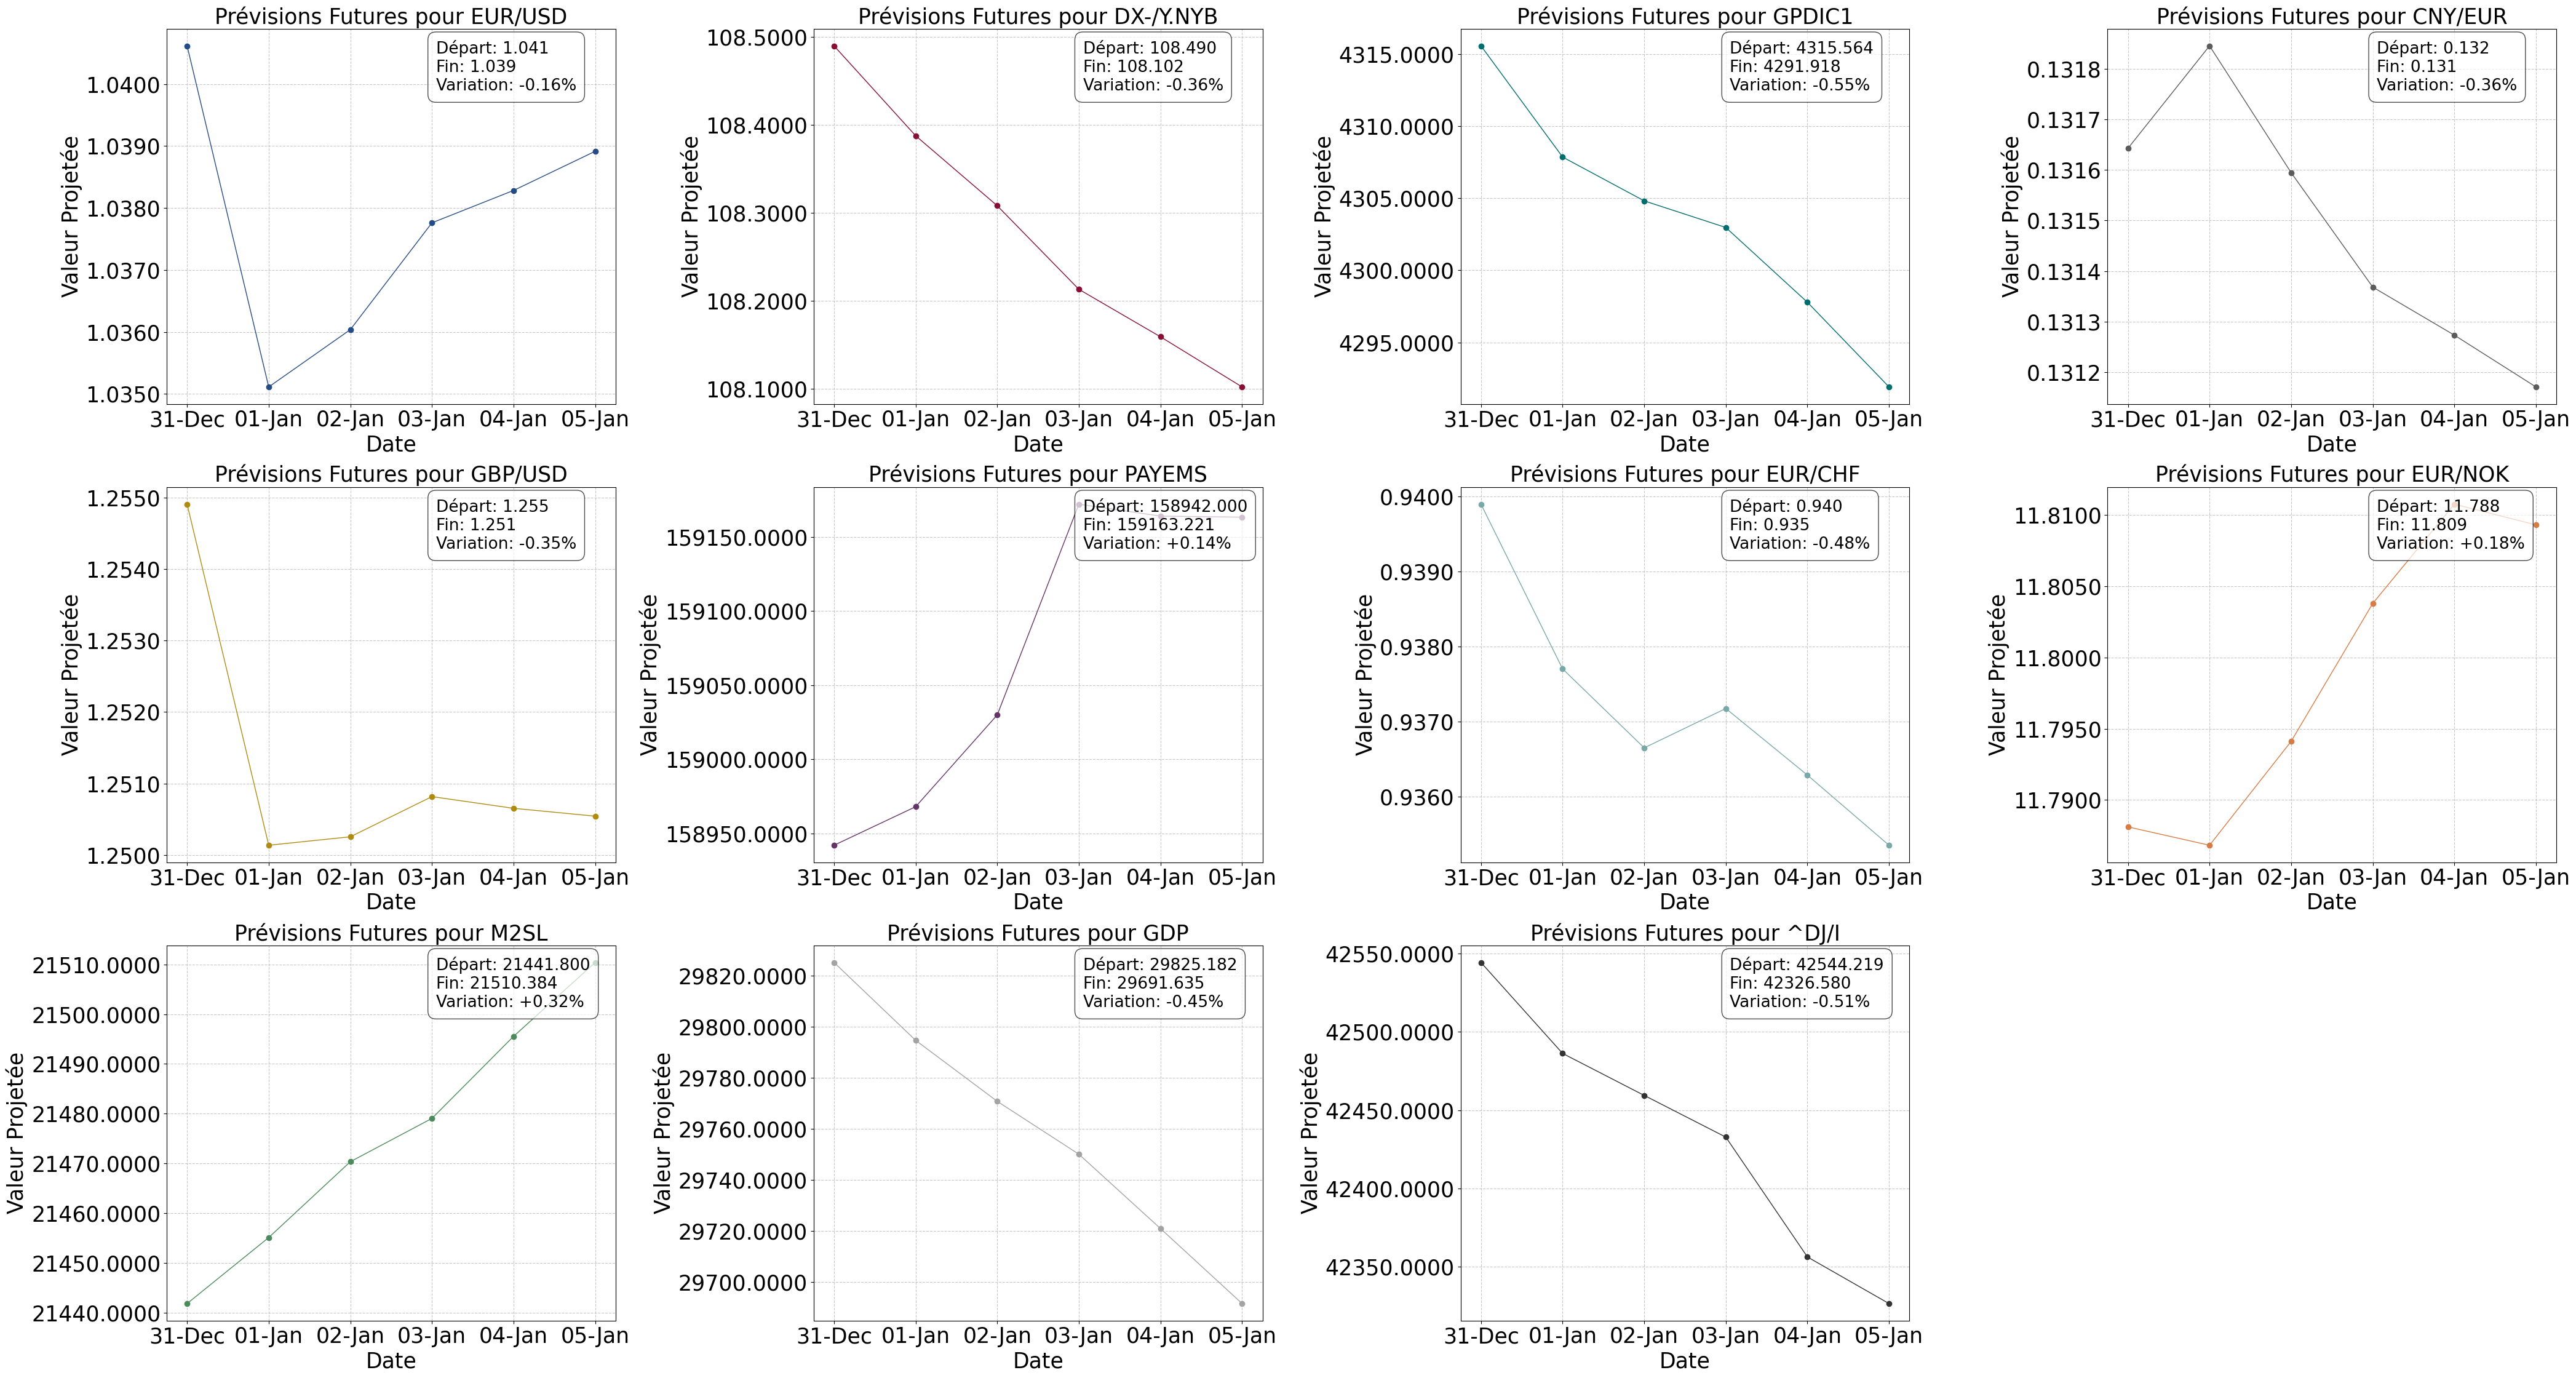

In [17]:
indicator_details = [
    (chosen_currency, '#254b85'),
    (first_indicator, '#880f33'),
    (second_indicator, '#006d6f'),
    (third_indicator, '#5c5c5c'),
    (fourth_indicator, '#b08b12'),
    (fifth_indicator, '#663366'),
    (sixth_indicator, '#79a8a9'),
    (seventh_indicator, '#d77c44'),
    (eighth_indicator, '#4b8a5a'),
    (ninth_indicator, '#a3a3a3'),
    (tenth_indicator, '#333333')
]

n_cols = 4
n_rows = (len(indicator_details) + n_cols - 1) // n_cols

plt.figure(figsize=(42, 7.5 * n_rows))

x = 25
y = 19

for i, (indicator_name, color) in enumerate(indicator_details, start=1):
    ax = plt.subplot(n_rows, n_cols, i)
    ax.plot(predicted_df.index, predicted_df[indicator_name], 
            label=f'Prévisions', color=color, linestyle='-', marker='o', linewidth=1)

    ax.set_title(f'Prévisions Futures pour {indicator_name}', fontsize=x)

    ax.set_xlabel('Date', fontsize=x)
    ax.set_ylabel('Valeur Projetée', fontsize=x)
    ax.tick_params(axis='y', labelsize=x)
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    plt.xticks(rotation=0, ha='center', fontsize=x)
    plt.yticks(fontsize=x)
    ax.grid(axis='both', linestyle='--', alpha=0.7)

    start_val = predicted_df[indicator_name].iloc[0]
    end_val = predicted_df[indicator_name].iloc[-1]
    if np.allclose(start_val, 0):
        pct_change_text = "N/A"
    else:
        pct_change = ((end_val - start_val) / start_val) * 100
        pct_change_text = f'{pct_change:+.2f}%'

    ax.text(0.6, 0.97, 
            f'Départ: {start_val:.3f}\nFin: {end_val:.3f}\nVariation: {pct_change_text}',
            transform=ax.transAxes, fontsize=y, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

for j in range(len(indicator_details), n_rows * n_cols):
    plt.subplot(n_rows, n_cols, j + 1)
    plt.axis('off')

plt.tight_layout()
plt.show()
